# hosuing price data

# loading data

In [4]:
import pandas as pd

# Load the datasets
ames_df = pd.read_csv('Ames_prepared.csv')
boston_df = pd.read_csv('boston_housing_preprocessed.csv')

# Display basic information about the datasets
ames_info = ames_df.info()
boston_info = boston_df.info()

# Show first few rows of each dataset
ames_head = ames_df.head()
boston_head = boston_df.head()

ames_info, ames_head, boston_info, boston_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2855 entries, 0 to 2854
Data columns (total 69 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        2855 non-null   int64  
 1   MSZoning          2855 non-null   object 
 2   LotFrontage       2855 non-null   float64
 3   LotArea           2855 non-null   int64  
 4   LotShape          2855 non-null   int64  
 5   LandContour       2855 non-null   object 
 6   LotConfig         2855 non-null   object 
 7   LandSlope         2855 non-null   object 
 8   Neighborhood      2855 non-null   object 
 9   Condition1        2855 non-null   object 
 10  Condition2        2855 non-null   object 
 11  BldgType          2855 non-null   object 
 12  HouseStyle        2855 non-null   object 
 13  OverallQual       2855 non-null   int64  
 14  OverallCond       2855 non-null   int64  
 15  YearRemod/Add     2855 non-null   int64  
 16  RoofStyle         2855 non-null   object 


(None,
    MSSubClass MSZoning  LotFrontage  LotArea  LotShape LandContour LotConfig  \
 0          20       RH    80.000000    11622         4         Lvl    Inside   
 1          20       RL    81.000000    14267         3         Lvl    Corner   
 2          20       RL    93.000000    11160         4         Lvl    Corner   
 3          60       RL    72.306998    13830         3         Lvl    Inside   
 4          60       RL    78.000000     9978         3         Lvl    Inside   
 
   LandSlope Neighborhood Condition1  ... SalePrice logSalePrice TotalSF  \
 0       Gtl        NAmes      Feedr  ...    105000    11.561725  1778.0   
 1       Gtl        NAmes       Norm  ...    172000    12.055256  2658.0   
 2       Gtl        NAmes       Norm  ...    244000    12.404928  4220.0   
 3       Gtl      Gilbert       Norm  ...    189900    12.154258  2557.0   
 4       Gtl      Gilbert       Norm  ...    195500    12.183321  2530.0   
 
    HasAlley  Neighborhood_ord  Conditions_vals

# Feature Selection:

In [6]:
# Correlation with target variable for Ames Housing Dataset
import numpy as np

# Select only numeric columns from the Ames dataset
ames_numeric = ames_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for the numeric features
ames_corr = ames_numeric.corr()

# Identify the top 10 features most correlated with the SalePrice
# We take the absolute values of the correlations, sort them in descending order,
# and select the top 11 (including SalePrice itself)
ames_top_features = ames_corr['SalePrice'].abs().sort_values(ascending=False).head(11).index

# Correlation with target variable for Boston Housing Dataset
boston_corr = boston_df.corr()

# Identify the top 10 features most correlated with the MEDV
# Similar to Ames, we take the absolute values of the correlations,
# sort them, and select the top 11 (including MEDV itself)
boston_top_features = boston_corr['MEDV'].abs().sort_values(ascending=False).head(11).index

# Return the top features from both datasets
ames_top_features, boston_top_features

(Index(['SalePrice', 'logSalePrice', 'TotalSF', 'OverallQual', 'GrLivArea',
        'ExterQual', 'KitchenQual', 'Neighborhood_ord', 'GarageCars',
        'GarageArea', 'TotalBsmtSF'],
       dtype='object'),
 Index(['MEDV', 'LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD',
        'AGE', 'ZN'],
       dtype='object'))

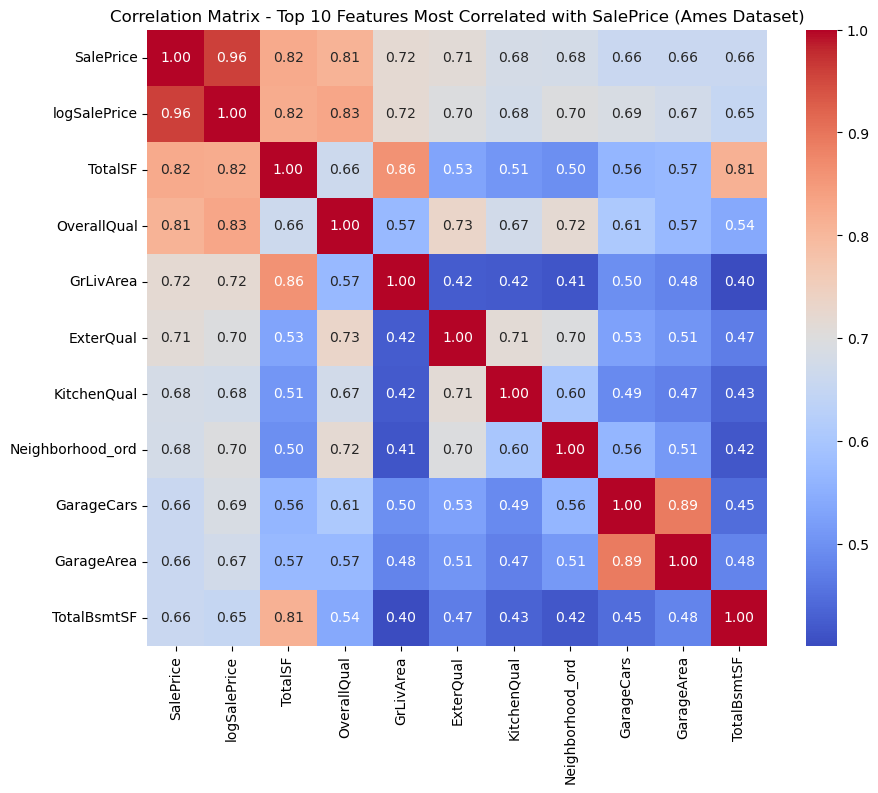

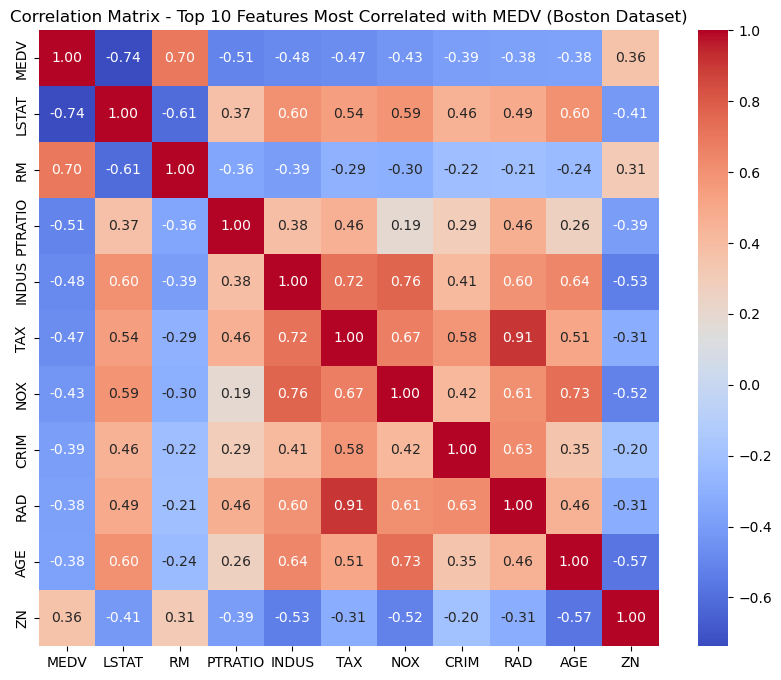

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation with target variable for Ames Housing Dataset
ames_numeric = ames_df.select_dtypes(include=[np.number])
ames_corr = ames_numeric.corr()

# Top 10 features most correlated with SalePrice (excluding SalePrice itself)
ames_top_features = ames_corr['SalePrice'].abs().sort_values(ascending=False).head(11).index

# Correlation matrix for the top features in Ames dataset
ames_corr_top = ames_corr.loc[ames_top_features, ames_top_features]

# Plotting the heatmap for Ames dataset
plt.figure(figsize=(10, 8))
sns.heatmap(ames_corr_top, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Top 10 Features Most Correlated with SalePrice (Ames Dataset)')
plt.show()

# Correlation with target variable for Boston Housing Dataset
boston_corr = boston_df.corr()

# Top 10 features most correlated with MEDV (excluding MEDV itself)
boston_top_features = boston_corr['MEDV'].abs().sort_values(ascending=False).head(11).index

# Correlation matrix for the top features in Boston dataset
boston_corr_top = boston_corr.loc[boston_top_features, boston_top_features]

# Plotting the heatmap for Boston dataset
plt.figure(figsize=(10, 8))
sns.heatmap(boston_corr_top, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Top 10 Features Most Correlated with MEDV (Boston Dataset)')
plt.show()


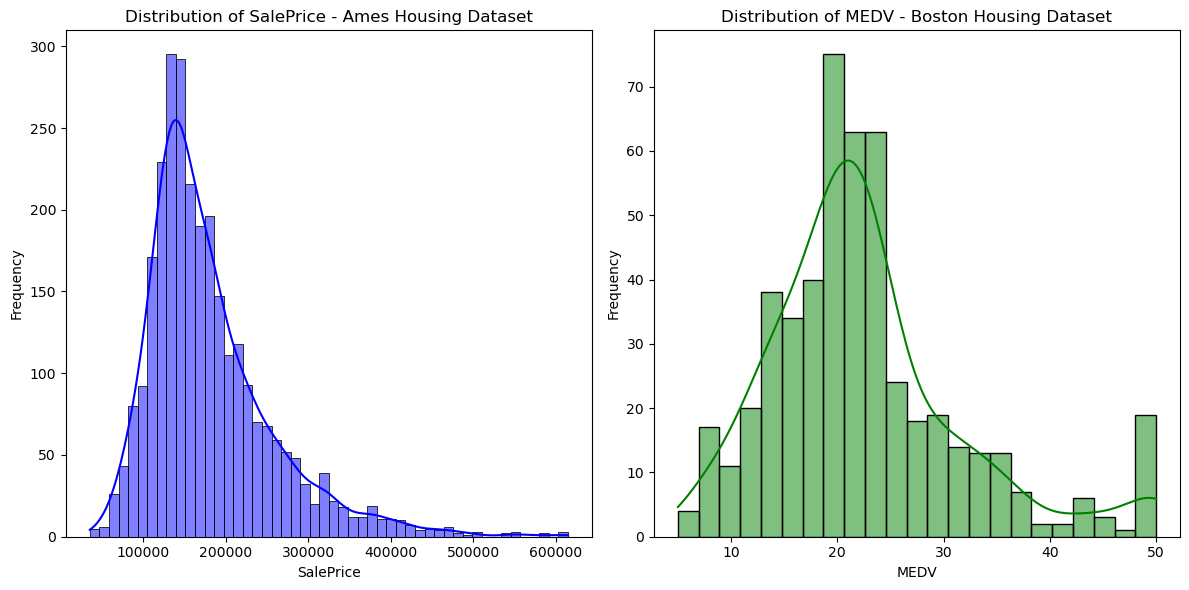

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of SalePrice for Ames Housing Dataset
plt.figure(figsize=(12, 6))

# Distribution plot for Ames dataset
plt.subplot(1, 2, 1)
sns.histplot(ames_df['SalePrice'], kde=True, color='blue')
plt.title('Distribution of SalePrice - Ames Housing Dataset')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')

# Plot distribution of MEDV for Boston Housing Dataset
# Distribution plot for Boston dataset
plt.subplot(1, 2, 2)
sns.histplot(boston_df['MEDV'], kde=True, color='green')
plt.title('Distribution of MEDV - Boston Housing Dataset')
plt.xlabel('MEDV')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# normalized
## split the data 

In [10]:
# Select top features based on previous analysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

ames_top_features = ['logSalePrice', 'TotalSF', 'OverallQual', 'GrLivArea', 'ExterQual', 
                     'KitchenQual', 'Neighborhood_ord', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
boston_top_features = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD', 'AGE', 'ZN']

# Initialize scalers
scaler_ames = StandardScaler()
scaler_boston = StandardScaler()

# Select and normalize features for Ames Housing Dataset
ames_selected_features = ames_df[ames_top_features]
ames_normalized = pd.DataFrame(scaler_ames.fit_transform(ames_selected_features), columns=ames_selected_features.columns)
ames_normalized['SalePrice'] = ames_df['SalePrice'].values

# Select and normalize features for Boston Housing Dataset
boston_selected_features = boston_df[boston_top_features]
boston_normalized = pd.DataFrame(scaler_boston.fit_transform(boston_selected_features), columns=boston_selected_features.columns)
boston_normalized['MEDV'] = boston_df['MEDV'].values

# Split the Ames dataset
ames_features = ames_normalized.drop(columns=['SalePrice'])
ames_target = ames_normalized['SalePrice']

ames_X_train, ames_X_test, ames_y_train, ames_y_test = train_test_split(
    ames_features, ames_target, test_size=0.2, random_state=42
)

# Split the Boston dataset
boston_features = boston_normalized.drop(columns=['MEDV'])
boston_target = boston_normalized['MEDV']

boston_X_train, boston_X_test, boston_y_train, boston_y_test = train_test_split(
    boston_features, boston_target, test_size=0.2, random_state=42
)

ames_X_train.shape, ames_X_test.shape, boston_X_train.shape, boston_X_test.shape


((2284, 10), (571, 10), (404, 10), (102, 10))

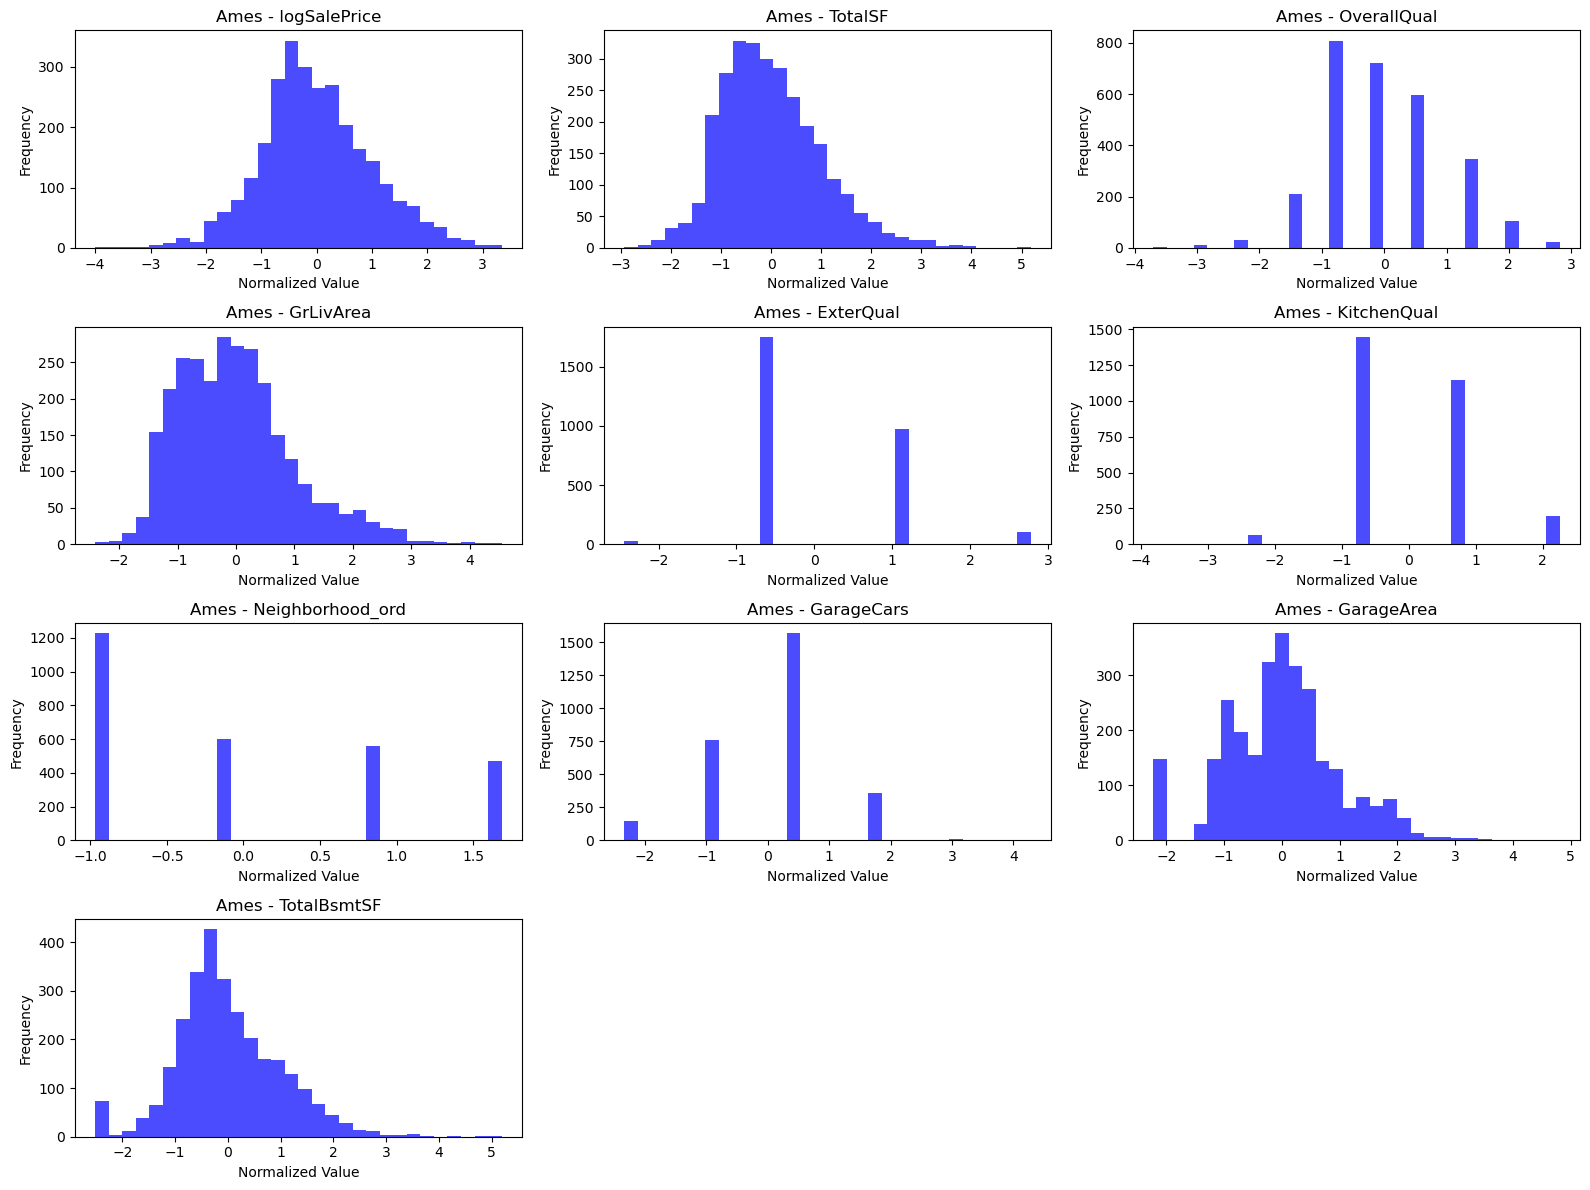

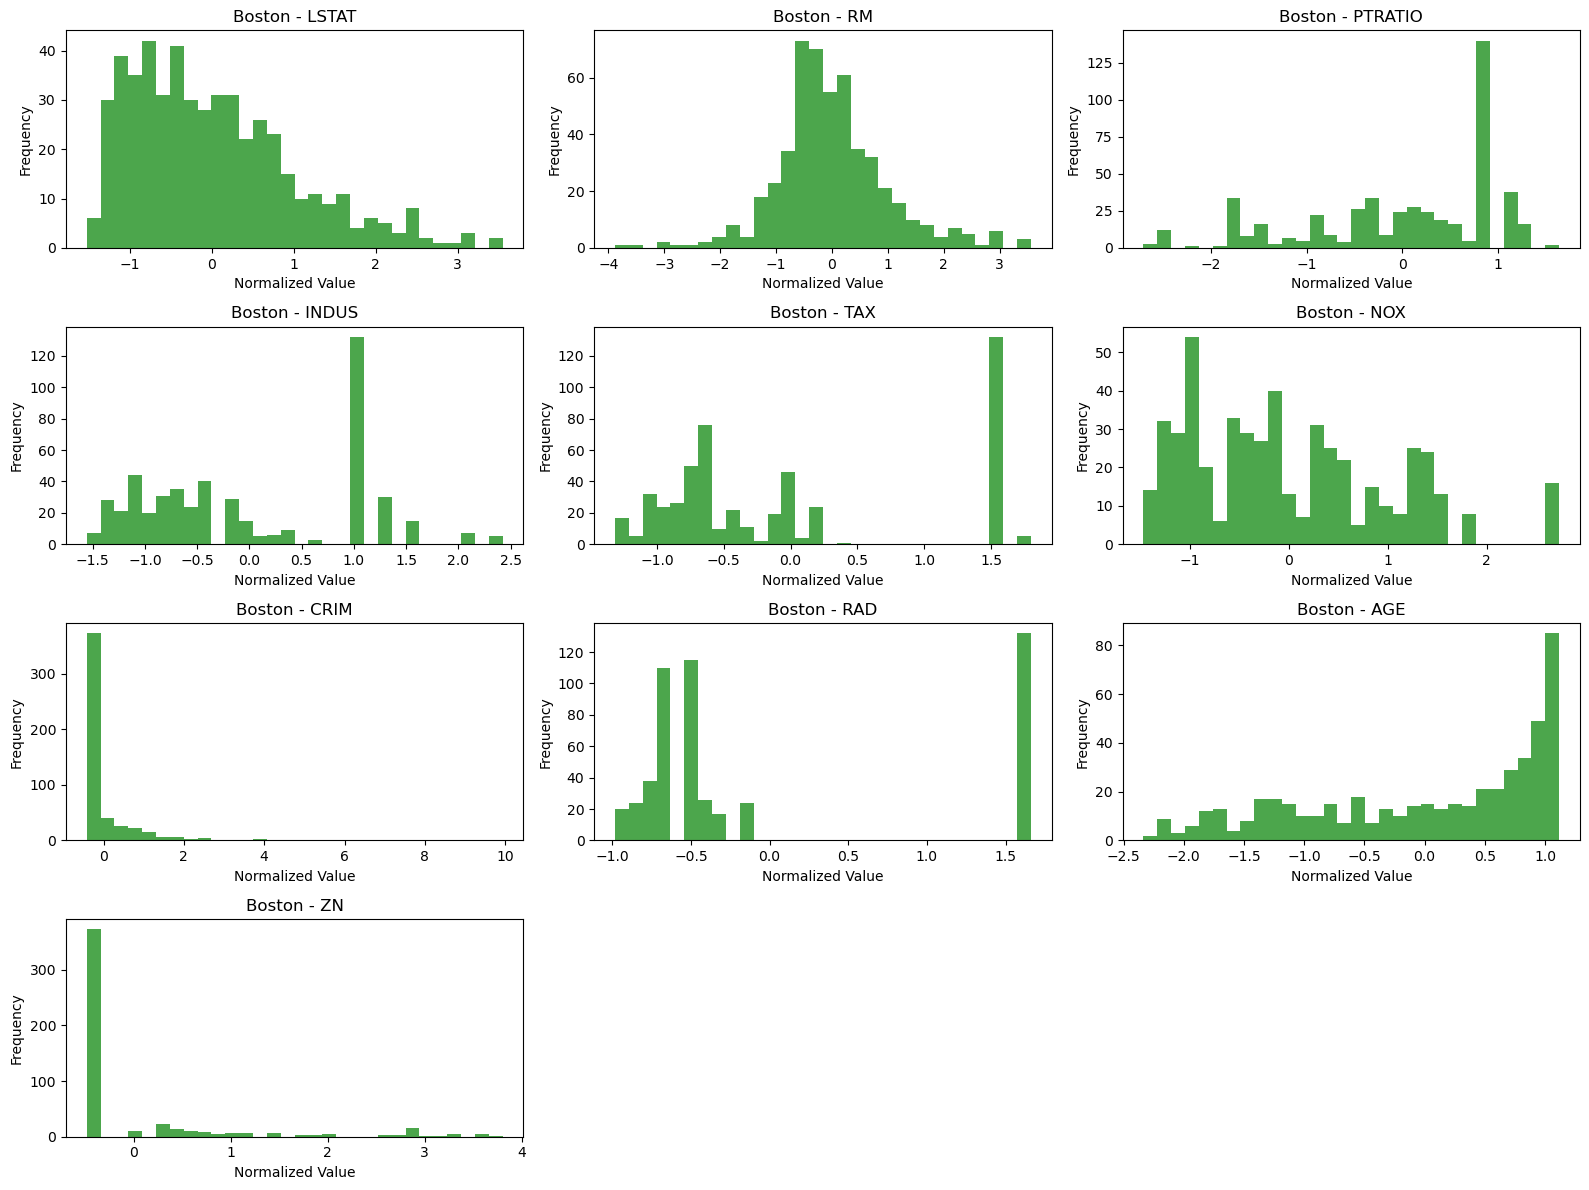

In [11]:
import matplotlib.pyplot as plt

# Plot histograms for Ames Housing Dataset
plt.figure(figsize=(16, 12))
for i, feature in enumerate(ames_top_features, 1):
    plt.subplot(4, 3, i)
    plt.hist(ames_normalized[feature], bins=30, color='blue', alpha=0.7)
    plt.title(f'Ames - {feature}')
    plt.xlabel('Normalized Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot histograms for Boston Housing Dataset
plt.figure(figsize=(16, 12))
for i, feature in enumerate(boston_top_features, 1):
    plt.subplot(4, 3, i)
    plt.hist(boston_normalized[feature], bins=30, color='green', alpha=0.7)
    plt.title(f'Boston - {feature}')
    plt.xlabel('Normalized Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# model implimentation for ames dataset

In [13]:
import numpy as np
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

class LinearRegressionScratch:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y, epochs=1000, learning_rate=0.01):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(epochs):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

# Initialize the model
lin_reg = LinearRegressionScratch()

# Fit the model on Ames dataset
lin_reg.fit(ames_X_train.values, ames_y_train.values)

# Predict on the test set
ames_y_pred = lin_reg.predict(ames_X_test.values)

# Calculate mean squared error on the test set
mse_ames = lin_reg.mean_squared_error(ames_y_test.values, ames_y_pred)
rmse_ames = np.sqrt(mse_ames)
r2_ames = r2_score(ames_y_test.values, ames_y_pred)

# Print the results
print(f"Mean Squared Error (MSE) on Ames Test Set: {mse_ames}")
print(f"Root Mean Squared Error (RMSE) on Ames Test Set: {rmse_ames}")
print(f"R-squared (R²) on Ames Test Set: {r2_ames}")


Mean Squared Error (MSE) on Ames Test Set: 491404262.86224246
Root Mean Squared Error (RMSE) on Ames Test Set: 22167.639993067427
R-squared (R²) on Ames Test Set: 0.9237390359781307


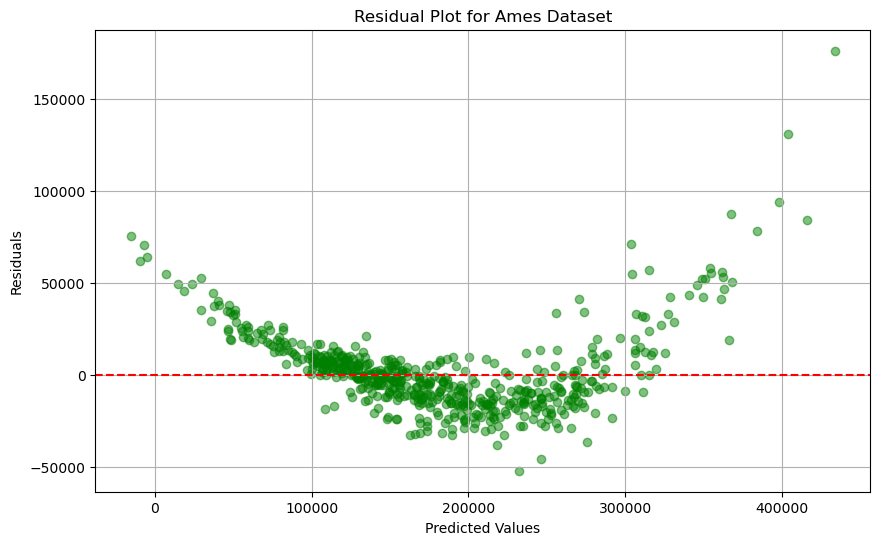

Residuals Summary Statistics:
count       571.000000
mean       1384.767091
std       22143.744750
min      -52049.926196
25%      -12185.282401
50%       -1426.832621
75%        8742.594713
max      176091.008322
dtype: float64


In [14]:
import matplotlib.pyplot as plt

# Step 1: Calculate residuals
ames_residuals = ames_y_test.values - ames_y_pred

# Step 2: Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(ames_y_pred, ames_residuals, color='g', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Ames Dataset')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Optionally, print summary statistics of the residuals
print("Residuals Summary Statistics:")
print(pd.Series(ames_residuals).describe())

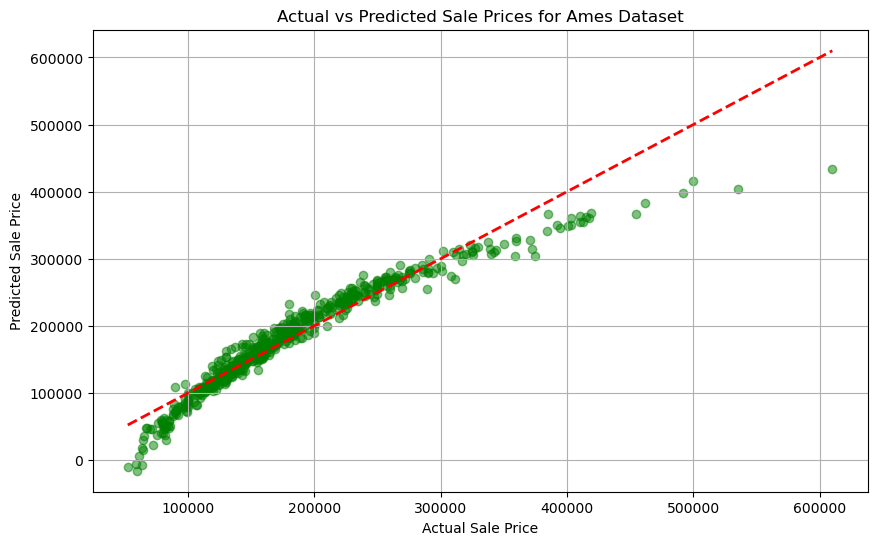

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the predicted and actual values from your model
ames_y_pred= lin_reg.predict(ames_X_test.values)
ames_actual_values = ames_y_test.values

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ames_actual_values, ames_y_pred, alpha=0.5, color='g')
plt.plot([ames_actual_values.min(), ames_actual_values.max()], [ames_actual_values.min(), ames_actual_values.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Sale Prices for Ames Dataset')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.grid(True)
plt.show()


In [16]:
class LassoRegressionScratch:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.weights = None
        self.bias = None

    def fit(self, X, y, epochs=1000, learning_rate=0.01):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(epochs):
            y_predicted = np.dot(X, self.weights) + self.bias

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + self.alpha * np.sign(self.weights)
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

class RidgeRegressionScratch:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.weights = None
        self.bias = None

    def fit(self, X, y, epochs=1000, learning_rate=0.01):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(epochs):
            y_predicted = np.dot(X, self.weights) + self.bias

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + (2 * self.alpha * self.weights)
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

# Initialize Lasso and Ridge models
lasso_reg = LassoRegressionScratch(alpha=0.1)
ridge_reg = RidgeRegressionScratch(alpha=0.1)

# Fit Lasso model on Ames dataset
lasso_reg.fit(ames_X_train.values, ames_y_train.values)
ames_y_pred_lasso = lasso_reg.predict(ames_X_test.values)
mse_lasso = lasso_reg.mean_squared_error(ames_y_test.values, ames_y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(ames_y_test.values, ames_y_pred_lasso)

# Fit Ridge model on Ames dataset
ridge_reg.fit(ames_X_train.values, ames_y_train.values)
ames_y_pred_ridge = ridge_reg.predict(ames_X_test.values)
mse_ridge = ridge_reg.mean_squared_error(ames_y_test.values, ames_y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(ames_y_test.values, ames_y_pred_ridge)

# Print the results
print(f"Mean Squared Error (MSE) on Ames Test Set: {mse_ridge}")
print(f"Root Mean Squared Error (RMSE) on Ames Test Set: {rmse_ridge}")
print(f"R-squared (R²) on Ames Test Set: {r2_ridge}")

print(f"Mean Squared Error (MSE) on Ames Test Set: {mse_lasso}")
print(f"Root Mean Squared Error (RMSE) on Ames Test Set: {rmse_lasso}")
print(f"R-squared (R²) on Ames Test Set: {r2_lasso}")

Mean Squared Error (MSE) on Ames Test Set: 583594753.6580621
Root Mean Squared Error (RMSE) on Ames Test Set: 24157.705885660213
R-squared (R²) on Ames Test Set: 0.9094320056304729
Mean Squared Error (MSE) on Ames Test Set: 491404258.36503655
Root Mean Squared Error (RMSE) on Ames Test Set: 22167.63989163115
R-squared (R²) on Ames Test Set: 0.9237390366760514


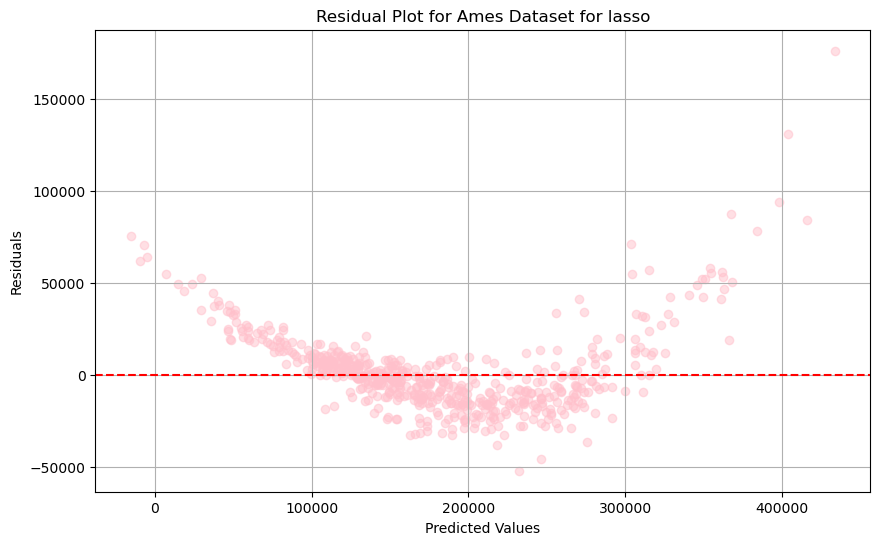

Residuals Summary Statistics:
count       571.000000
mean       1384.786526
std       22143.743430
min      -52049.738892
25%      -12185.106894
50%       -1427.147996
75%        8742.534064
max      176091.430723
dtype: float64


In [17]:
import matplotlib.pyplot as plt

# Step 1: Calculate residuals
ames_residuals = ames_y_test.values - ames_y_pred_lasso

# Step 2: Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(ames_y_pred_lasso, ames_residuals, color='pink', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Ames Dataset for lasso')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Optionally, print summary statistics of the residuals
print("Residuals Summary Statistics:")
print(pd.Series(ames_residuals).describe())

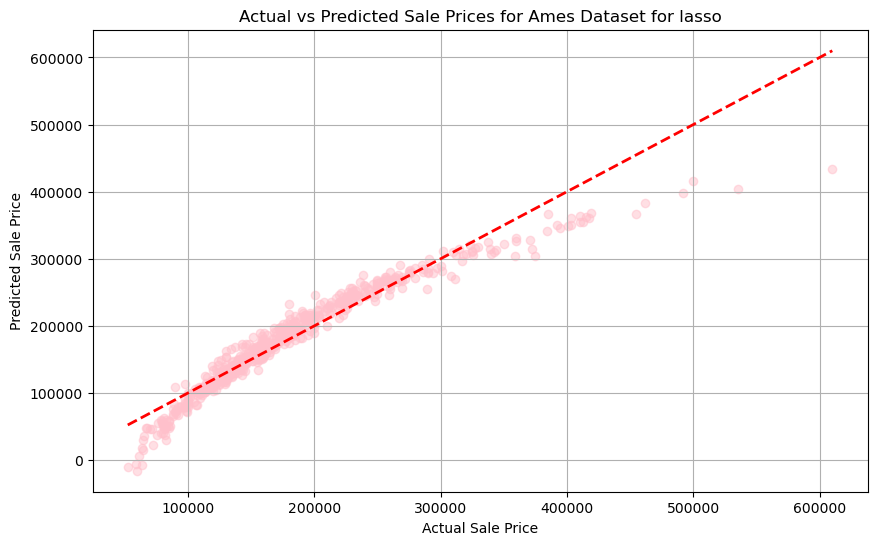

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the predicted and actual values from your model
ames_y_pred= lasso_reg.predict(ames_X_test.values)
ames_actual_values = ames_y_test.values

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ames_actual_values, ames_y_pred, alpha=0.5, color='pink')
plt.plot([ames_actual_values.min(), ames_actual_values.max()], [ames_actual_values.min(), ames_actual_values.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Sale Prices for Ames Dataset for lasso')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.grid(True)
plt.show()

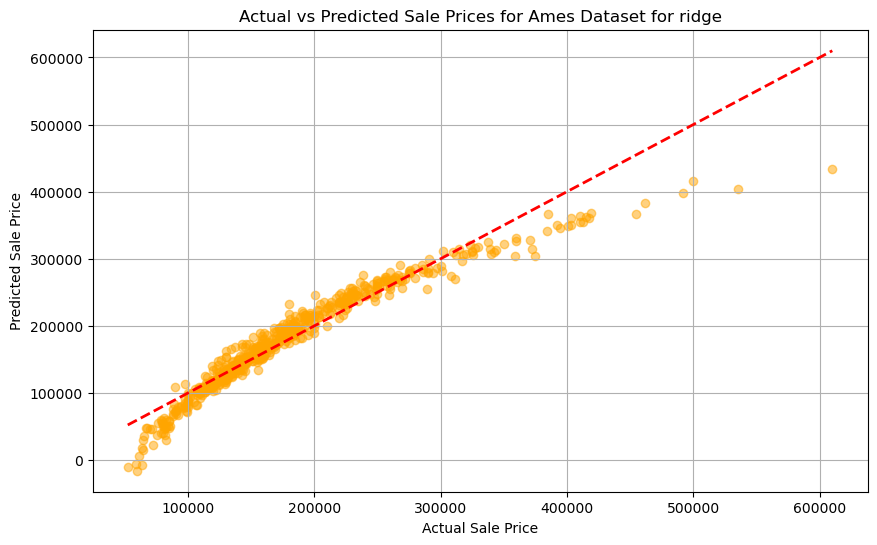

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the predicted and actual values from your model
ames_y_pred= lasso_reg.predict(ames_X_test.values)
ames_actual_values = ames_y_test.values

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ames_actual_values, ames_y_pred, alpha=0.5, color='orange')
plt.plot([ames_actual_values.min(), ames_actual_values.max()], [ames_actual_values.min(), ames_actual_values.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Sale Prices for Ames Dataset for ridge')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.grid(True)
plt.show()

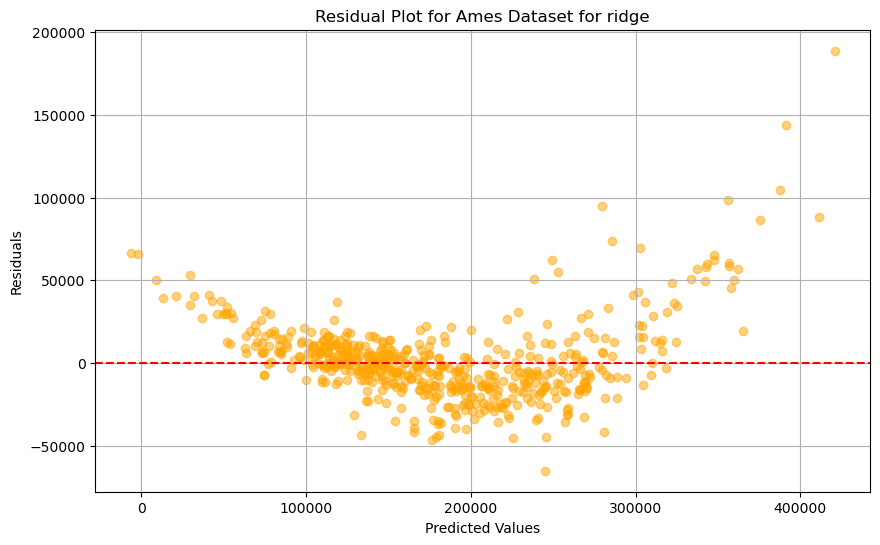

Residuals Summary Statistics:
count       571.000000
mean       1276.102460
std       24145.130145
min      -65171.354824
25%      -12509.328768
50%        -895.854025
75%       10477.479755
max      188878.924257
dtype: float64


In [20]:
import matplotlib.pyplot as plt

# Step 1: Calculate residuals
ames_residuals = ames_y_test.values - ames_y_pred_ridge

# Step 2: Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(ames_y_pred_ridge, ames_residuals, color='orange', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Ames Dataset for ridge')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Optionally, print summary statistics of the residuals
print("Residuals Summary Statistics:")
print(pd.Series(ames_residuals).describe())

# model implimentation for boston dataset

In [22]:
# Initialize the models for the Boston dataset
lin_reg_boston = LinearRegressionScratch()
lasso_reg_boston = LassoRegressionScratch(alpha=0.01)
ridge_reg_boston = RidgeRegressionScratch(alpha=0.01)

# Fit the Linear Regression model on Boston dataset
lin_reg_boston.fit(boston_X_train.values, boston_y_train.values)
boston_y_pred_lin = lin_reg_boston.predict(boston_X_test.values)
mse_lin_boston = lin_reg_boston.mean_squared_error(boston_y_test.values, boston_y_pred_lin)
rmse_lin_boston = np.sqrt(mse_lin_boston)
r2_lin_boston = r2_score(boston_y_test.values, boston_y_pred_lin)

# Fit the Lasso Regression model on Boston dataset
lasso_reg_boston.fit(boston_X_train.values, boston_y_train.values)
boston_y_pred_lasso = lasso_reg_boston.predict(boston_X_test.values)
mse_lasso_boston = lasso_reg_boston.mean_squared_error(boston_y_test.values, boston_y_pred_lasso)
rmse_lasso_boston = np.sqrt(mse_lasso_boston)
r2_lasso_boston = r2_score(boston_y_test.values, boston_y_pred_lasso)

# Fit the Ridge Regression model on Boston dataset
ridge_reg_boston.fit(boston_X_train.values, boston_y_train.values)
boston_y_pred_ridge = ridge_reg_boston.predict(boston_X_test.values)
mse_ridge_boston = ridge_reg_boston.mean_squared_error(boston_y_test.values, boston_y_pred_ridge)
rmse_ridge_boston = np.sqrt(mse_ridge_boston)
r2_ridge_boston = r2_score(boston_y_test.values, boston_y_pred_ridge)

# Print the results for Linear Regression
print(f"Linear Regression - Boston Dataset:")
print(f"Mean Squared Error (MSE): {mse_lin_boston}")
print(f"Root Mean Squared Error (RMSE): {rmse_lin_boston}")
print(f"R-squared (R²): {r2_lin_boston}")
print()

# Print the results for Lasso Regression
print(f"Lasso Regression - Boston Dataset:")
print(f"Mean Squared Error (MSE): {mse_lasso_boston}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso_boston}")
print(f"R-squared (R²): {r2_lasso_boston}")
print()

# Print the results for Ridge Regression
print(f"Ridge Regression - Boston Dataset:")
print(f"Mean Squared Error (MSE): {mse_ridge_boston}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge_boston}")
print(f"R-squared (R²): {r2_ridge_boston}")


Linear Regression - Boston Dataset:
Mean Squared Error (MSE): 27.399794086164256
Root Mean Squared Error (RMSE): 5.234481262375887
R-squared (R²): 0.6263687361353962

Lasso Regression - Boston Dataset:
Mean Squared Error (MSE): 27.417890435753723
Root Mean Squared Error (RMSE): 5.236209548495335
R-squared (R²): 0.6261219692455728

Ridge Regression - Boston Dataset:
Mean Squared Error (MSE): 27.305526997399145
Root Mean Squared Error (RMSE): 5.225469069605057
R-squared (R²): 0.6276541885517679


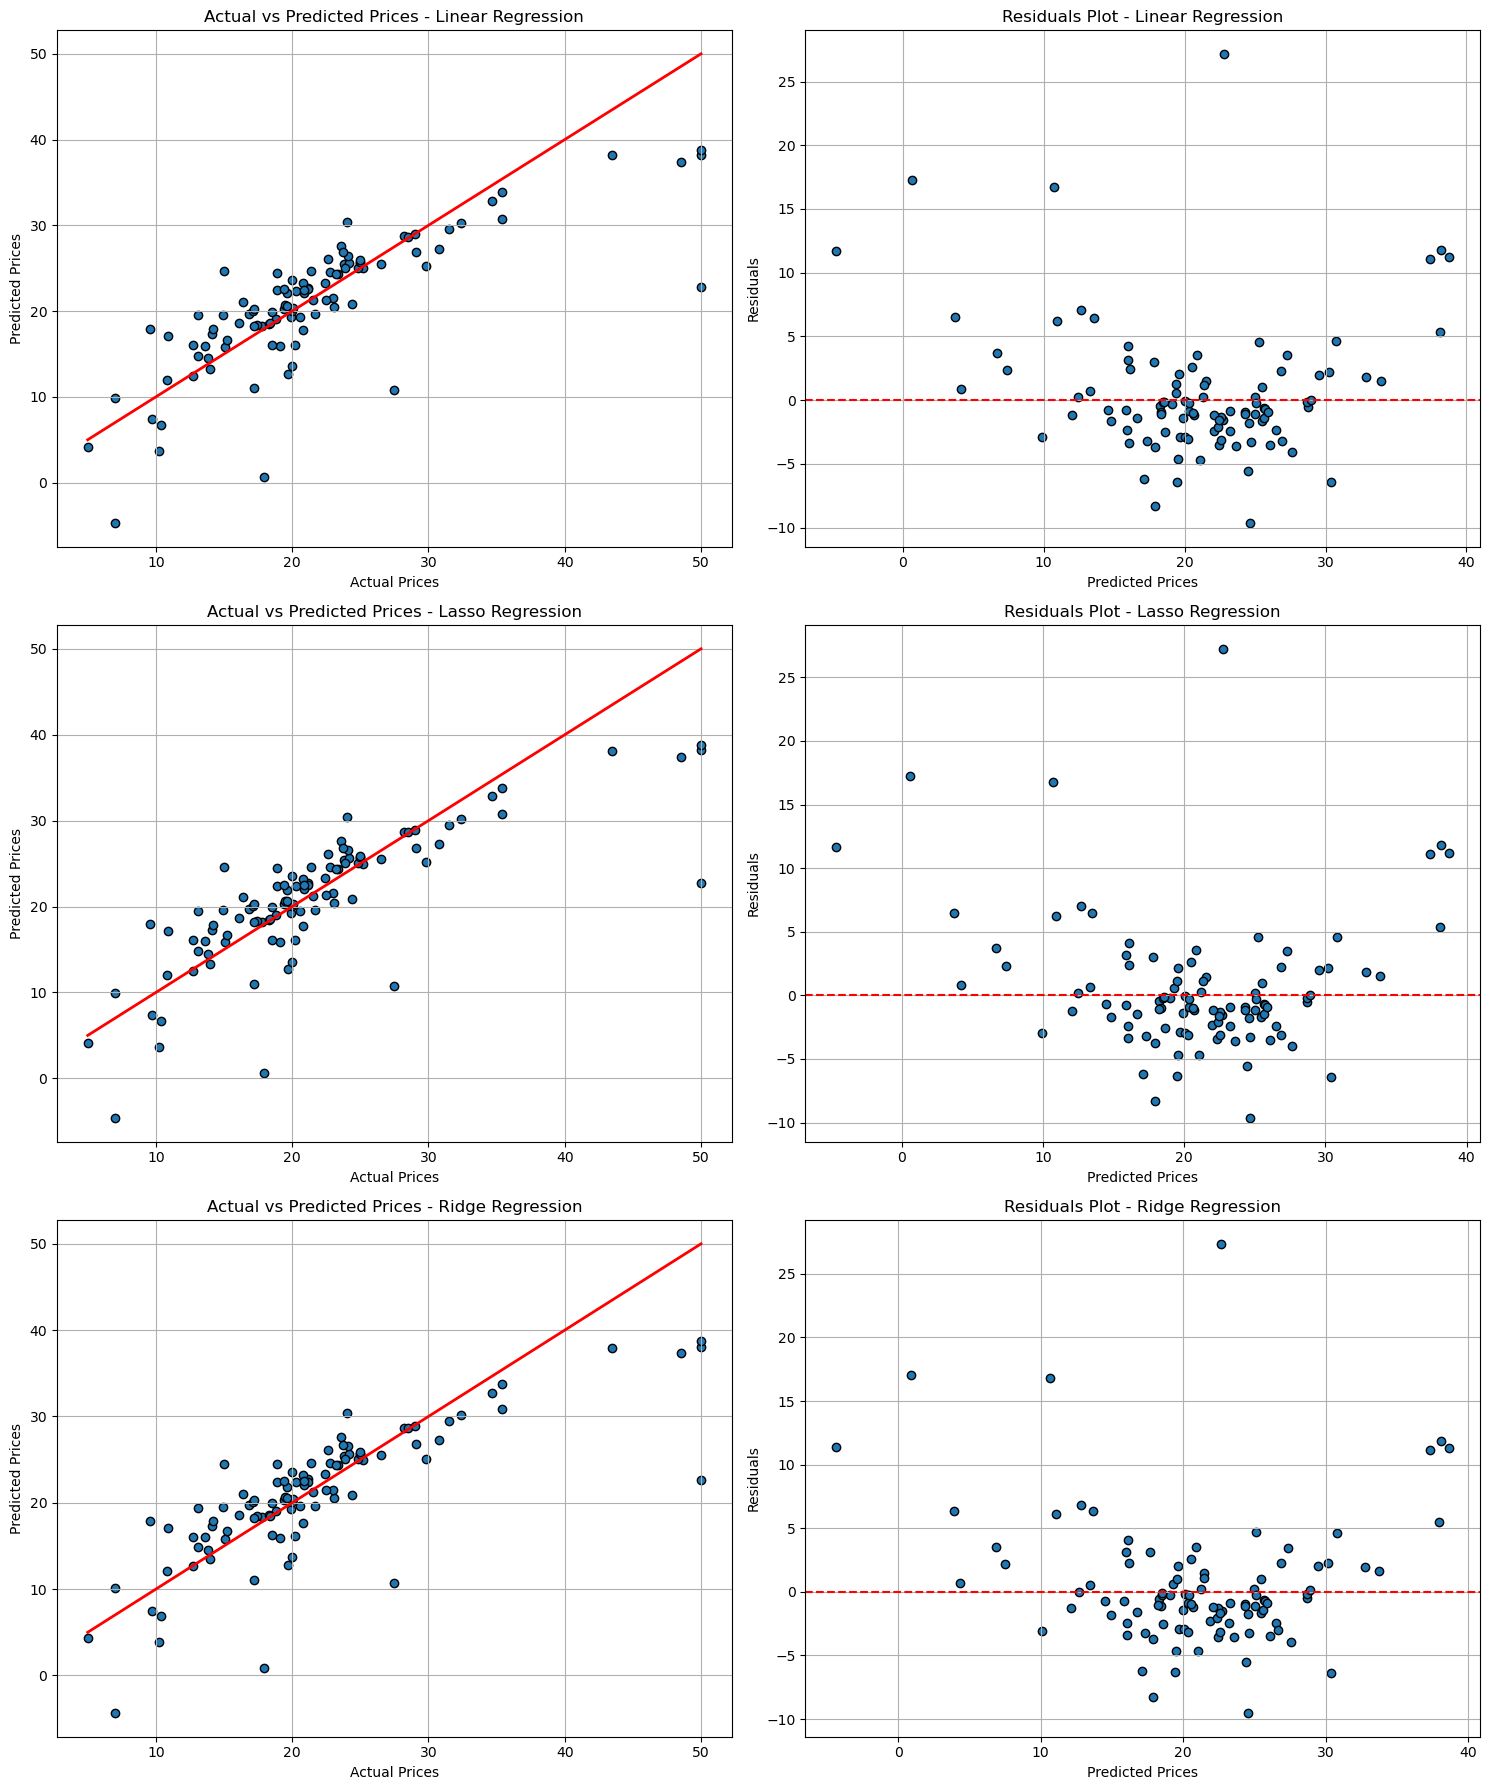

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Combined plotting function
def plot_all_models(y_true, y_pred_lin, y_pred_lasso, y_pred_ridge):
    fig, axes = plt.subplots(3, 2, figsize=(15, 18))

    # Plot Actual vs Predicted for Linear Regression
    axes[0, 0].scatter(y_true, y_pred_lin, edgecolors=(0, 0, 0))
    axes[0, 0].plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r', lw=2)
    axes[0, 0].set_title('Actual vs Predicted Prices - Linear Regression')
    axes[0, 0].set_xlabel('Actual Prices')
    axes[0, 0].set_ylabel('Predicted Prices')
    axes[0, 0].grid(True)

    # Plot Residuals for Linear Regression
    residuals_lin = y_true - y_pred_lin
    axes[0, 1].scatter(y_pred_lin, residuals_lin, edgecolors=(0, 0, 0))
    axes[0, 1].axhline(y=0, color='r', linestyle='--')
    axes[0, 1].set_title('Residuals Plot - Linear Regression')
    axes[0, 1].set_xlabel('Predicted Prices')
    axes[0, 1].set_ylabel('Residuals')
    axes[0, 1].grid(True)

    # Plot Actual vs Predicted for Lasso Regression
    axes[1, 0].scatter(y_true, y_pred_lasso, edgecolors=(0, 0, 0))
    axes[1, 0].plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r', lw=2)
    axes[1, 0].set_title('Actual vs Predicted Prices - Lasso Regression')
    axes[1, 0].set_xlabel('Actual Prices')
    axes[1, 0].set_ylabel('Predicted Prices')
    axes[1, 0].grid(True)

    # Plot Residuals for Lasso Regression
    residuals_lasso = y_true - y_pred_lasso
    axes[1, 1].scatter(y_pred_lasso, residuals_lasso, edgecolors=(0, 0, 0))
    axes[1, 1].axhline(y=0, color='r', linestyle='--')
    axes[1, 1].set_title('Residuals Plot - Lasso Regression')
    axes[1, 1].set_xlabel('Predicted Prices')
    axes[1, 1].set_ylabel('Residuals')
    axes[1, 1].grid(True)

    # Plot Actual vs Predicted for Ridge Regression
    axes[2, 0].scatter(y_true, y_pred_ridge, edgecolors=(0, 0, 0))
    axes[2, 0].plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r', lw=2)
    axes[2, 0].set_title('Actual vs Predicted Prices - Ridge Regression')
    axes[2, 0].set_xlabel('Actual Prices')
    axes[2, 0].set_ylabel('Predicted Prices')
    axes[2, 0].grid(True)

    # Plot Residuals for Ridge Regression
    residuals_ridge = y_true - y_pred_ridge
    axes[2, 1].scatter(y_pred_ridge, residuals_ridge, edgecolors=(0, 0, 0))
    axes[2, 1].axhline(y=0, color='r', linestyle='--')
    axes[2, 1].set_title('Residuals Plot - Ridge Regression')
    axes[2, 1].set_xlabel('Predicted Prices')
    axes[2, 1].set_ylabel('Residuals')
    axes[2, 1].grid(True)

    plt.tight_layout()
    plt.show()

# Call the combined plot function
plot_all_models(boston_y_test.values, boston_y_pred_lin, boston_y_pred_lasso, boston_y_pred_ridge)



## Polynomial Feature Expansion and Grid Search for Regression of both dataset


In [25]:
from itertools import combinations_with_replacement
import numpy as np
from sklearn.metrics import r2_score

# Function to add polynomial features
def add_polynomial_features(X, degree=2):
    """
    Adds polynomial features up to the specified degree to the input features.

    Parameters:
    X (numpy array): Original feature matrix.
    degree (int): The degree of polynomial features to add.

    Returns:
    numpy array: New feature matrix with polynomial features added.
    """
    n_samples, n_features = X.shape
    new_features = X.copy()

    # Generate polynomial features
    for deg in range(2, degree + 1):
        for combo in combinations_with_replacement(range(n_features), deg):
            new_feature = np.prod(X[:, combo], axis=1)
            new_features = np.column_stack([new_features, new_feature])

    return new_features

# Function to perform grid search over alpha values
def grid_search_alpha(X_train, y_train, X_test, y_test, model_class, alphas, **model_params):
    """
    Perform grid search to find the best alpha for a given model class.

    Parameters:
    X_train, y_train: Training data.
    X_test, y_test: Test data.
    model_class: The regression model class (e.g., LassoRegressionScratch, RidgeRegressionScratch).
    alphas (list): List of alpha values to search over.
    model_params (dict): Additional parameters for the model.

    Returns:
    best_alpha (float): The best alpha value.
    best_rmse (float): The RMSE associated with the best alpha.
    best_r2 (float): The R-squared value associated with the best alpha.
    """
    best_alpha = None
    best_rmse = float('inf')
    best_r2 = None

    # Iterate over each alpha value
    for alpha in alphas:
        model = model_class(alpha=alpha, **model_params)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = model.mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Update best parameters if current RMSE is better
        if rmse < best_rmse:
            best_rmse = rmse
            best_alpha = alpha
            best_r2 = r2

    return best_alpha, best_rmse, best_r2

# Adding polynomial features to Ames dataset
print("Adding polynomial features to Ames dataset...")
ames_X_train_poly = add_polynomial_features(ames_X_train.values, degree=2)
ames_X_test_poly = add_polynomial_features(ames_X_test.values, degree=2)

# Perform grid search for Lasso and Ridge with a range of alphas
print("Performing grid search for Lasso and Ridge Regression...")

alphas = [0.01, 0.1, 1, 10, 100]

# Grid search for Lasso Regression
best_alpha_lasso, best_rmse_lasso, best_r2_lasso = grid_search_alpha(
    ames_X_train_poly, ames_y_train.values, ames_X_test_poly, ames_y_test.values, 
    LassoRegressionScratch, alphas
)

# Grid search for Ridge Regression
best_alpha_ridge, best_rmse_ridge, best_r2_ridge = grid_search_alpha(
    ames_X_train_poly, ames_y_train.values, ames_X_test_poly, ames_y_test.values, 
    RidgeRegressionScratch, alphas
)

# Print the best results for Lasso and Ridge Regression
print(f"\nBest Lasso Regression:")
print(f"Best Alpha: {best_alpha_lasso}")
print(f"Best RMSE: {best_rmse_lasso}")
print(f"Best R-squared (R²): {best_r2_lasso}")

print(f"\nBest Ridge Regression:")
print(f"Best Alpha: {best_alpha_ridge}")
print(f"Best RMSE: {best_rmse_ridge}")
print(f"Best R-squared (R²): {best_r2_ridge}")
ames_X_train_poly.shape,ames_X_test_poly.shape


Adding polynomial features to Ames dataset...
Performing grid search for Lasso and Ridge Regression...

Best Lasso Regression:
Best Alpha: 100
Best RMSE: 15091.539431450406
Best R-squared (R²): 0.9646547989049239

Best Ridge Regression:
Best Alpha: 0.01
Best RMSE: 15493.161750993975
Best R-squared (R²): 0.9627485243403959


C:\Users\INTEL\AppData\Local\Temp\ipykernel_18948\4279098239.py:51: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred) ** 2)
D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:1196: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


((2284, 65), (571, 65))

In [26]:
from sklearn.model_selection import KFold
import numpy as np

# Function to perform cross-validation for a specific alpha
def cross_val_score_alpha(X, y, model_class, alpha, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    rmse_list = []
    r2_list = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        model = model_class(alpha=alpha)
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_val)
        mse = model.mean_squared_error(y_val, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_val, y_pred)
        
        rmse_list.append(rmse)
        r2_list.append(r2)
    
    return np.mean(rmse_list), np.mean(r2_list)

# Function to perform grid search with cross-validation
def cross_val_grid_search(X, y, model_class, alphas, n_splits=5):
    best_alpha = None
    best_rmse = float('inf')
    best_r2 = -float('inf')

    for alpha in alphas:
        rmse, r2 = cross_val_score_alpha(X, y, model_class, alpha, n_splits)
        
        print(f"Alpha: {alpha}, RMSE: {rmse}, R²: {r2}")
        
        if rmse < best_rmse:
            best_rmse = rmse
            best_r2 = r2
            best_alpha = alpha
    
    return best_alpha, best_rmse, best_r2

# Cross-validation grid search for Lasso Regression
best_alpha_lasso_cv, best_rmse_lasso_cv, best_r2_lasso_cv = cross_val_grid_search(
    ames_X_train_poly, ames_y_train.values, LassoRegressionScratch, alphas
)

# Cross-validation grid search for Ridge Regression
best_alpha_ridge_cv, best_rmse_ridge_cv, best_r2_ridge_cv = cross_val_grid_search(
    ames_X_train_poly, ames_y_train.values, RidgeRegressionScratch, alphas
)

# Print the best cross-validation results for Lasso Regression
print(f"\nBest Lasso Regression with Cross-Validation:")
print(f"Best Alpha: {best_alpha_lasso_cv}")
print(f"Best RMSE: {best_rmse_lasso_cv}")
print(f"Best R-squared (R²): {best_r2_lasso_cv}")

# Print the best cross-validation results for Ridge Regression
print(f"\nBest Ridge Regression with Cross-Validation:")
print(f"Best Alpha: {best_alpha_ridge_cv}")
print(f"Best RMSE: {best_rmse_ridge_cv}")
print(f"Best R-squared (R²): {best_r2_ridge_cv}")


Alpha: 0.01, RMSE: 15964.279618516244, R²: 0.9546116673219934
Alpha: 0.1, RMSE: 15963.811872046048, R²: 0.9546143293649436
Alpha: 1, RMSE: 15959.136432937248, R²: 0.9546409342533815
Alpha: 10, RMSE: 15912.494520844168, R²: 0.9549061931558116
Alpha: 100, RMSE: 15475.861457049032, R²: 0.9573629467294438
Alpha: 0.01, RMSE: 15738.240362670414, R²: 0.9559823159340299
Alpha: 0.1, RMSE: 17396.853192634775, R²: 0.9468640143852399
Alpha: 1, RMSE: 27654.596157921555, R²: 0.8668653257849067
Alpha: 10, RMSE: 51544.925459636484, R²: 0.5382580721189845


C:\Users\INTEL\AppData\Local\Temp\ipykernel_18948\4279098239.py:51: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred) ** 2)
D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:1196: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
C:\Users\INTEL\AppData\Local\Temp\ipykernel_18948\4279098239.py:51: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred) ** 2)
D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:1196: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
C:\Users\INTEL\AppData\Local\Temp\ipykernel_18948\4279098239.py:51: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred) ** 2)
D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:1196: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - 

Alpha: 100, RMSE: inf, R²: -inf

Best Lasso Regression with Cross-Validation:
Best Alpha: 100
Best RMSE: 15475.861457049032
Best R-squared (R²): 0.9573629467294438

Best Ridge Regression with Cross-Validation:
Best Alpha: 0.01
Best RMSE: 15738.240362670414
Best R-squared (R²): 0.9559823159340299


C:\Users\INTEL\AppData\Local\Temp\ipykernel_18948\4279098239.py:51: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred) ** 2)
D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:1196: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


In [27]:
# Adding polynomial features to Boston dataset
boston_X_train_poly = add_polynomial_features(boston_X_train.values, degree=2)
boston_X_test_poly = add_polynomial_features(boston_X_test.values, degree=2)

# Perform grid search for Lasso and Ridge with a range of alphas for the Boston dataset
best_alpha_lasso_boston, best_rmse_lasso_boston, best_r2_lasso_boston = grid_search_alpha(
    boston_X_train_poly, boston_y_train.values, boston_X_test_poly, boston_y_test.values, 
    LassoRegressionScratch, alphas
)

best_alpha_ridge_boston, best_rmse_ridge_boston, best_r2_ridge_boston = grid_search_alpha(
    boston_X_train_poly, boston_y_train.values, boston_X_test_poly, boston_y_test.values, 
    RidgeRegressionScratch, alphas
)

best_alpha_lasso_boston, best_rmse_lasso_boston, best_r2_lasso_boston, best_alpha_ridge_boston, best_rmse_ridge_boston, best_r2_ridge_boston


C:\Users\INTEL\AppData\Local\Temp\ipykernel_18948\4279098239.py:51: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred) ** 2)
D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:1196: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


(0.1,
 4.409611550054982,
 0.7348469806900841,
 0.1,
 4.342800196687526,
 0.7428209382418263)

In [28]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

def cross_val_score_alpha(X, y, model_class, alpha, k_folds=5):
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    rmses = []
    r2s = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        model = model_class(alpha=alpha)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        r2 = r2_score(y_val, y_pred)

        rmses.append(rmse)
        r2s.append(r2)

    return np.mean(rmses), np.mean(r2s)

def grid_search_alpha_cross_val(X, y, model_class, alphas, k_folds=5):
    best_alpha = None
    best_rmse = float('inf')
    best_r2 = float('-inf')

    for alpha in alphas:
        mean_rmse, mean_r2 = cross_val_score_alpha(X, y, model_class, alpha, k_folds)

        if mean_rmse < best_rmse:
            best_rmse = mean_rmse
            best_alpha = alpha
            best_r2 = mean_r2

    return best_alpha, best_rmse, best_r2

# Assuming you have the following already defined:
# boston_X_train_poly, boston_y_train, LassoRegressionScratch, RidgeRegressionScratch, alphas

best_alpha_lasso_boston, best_rmse_lasso_boston, best_r2_lasso_boston = grid_search_alpha_cross_val(
    boston_X_train_poly, boston_y_train.values, LassoRegressionScratch, alphas
)

best_alpha_ridge_boston, best_rmse_ridge_boston, best_r2_ridge_boston = grid_search_alpha_cross_val(
    boston_X_train_poly, boston_y_train.values, RidgeRegressionScratch, alphas
)

best_alpha_lasso_boston, best_rmse_lasso_boston, best_r2_lasso_boston, best_alpha_ridge_boston, best_rmse_ridge_boston, best_r2_ridge_boston


D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:501: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:1196: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:501: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:1196: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:501: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
D:\anaconda\Lib\site-pack

(0.1,
 4.416582215100053,
 0.7680389337356286,
 0.1,
 4.326614238704834,
 0.7754571931640679)

# ElasticNetRegressionScratch

In [30]:
import numpy as np
from sklearn.metrics import r2_score

class ElasticNetRegressionScratch:
    def __init__(self, alpha=1.0, l1_ratio=0.5, epochs=1000, learning_rate=0.01):
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Gradient calculation
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) \
                 + self.alpha * (self.l1_ratio * np.sign(self.weights) + (1 - self.l1_ratio) * 2 * self.weights)
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)
    
    def get_params(self, deep=True):
        return {
            "alpha": self.alpha,
            "l1_ratio": self.l1_ratio,
            "epochs": self.epochs,
            "learning_rate": self.learning_rate
        }
    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

# Function for Grid Search
def grid_search_elastic_net(X_train, y_train, X_test, y_test, alphas, l1_ratios):
    best_alpha = None
    best_l1_ratio = None
    best_rmse = float('inf')
    best_mse = float('inf')
    best_r2 = None

    for alpha in alphas:
        for l1_ratio in l1_ratios:
            model = ElasticNetRegressionScratch(alpha=alpha, l1_ratio=l1_ratio)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mse = model.mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, y_pred)

            if rmse < best_rmse:
                best_rmse = rmse
                best_mse = mse
                best_alpha = alpha
                best_l1_ratio = l1_ratio
                best_r2 = r2

    return best_alpha, best_l1_ratio, best_rmse, best_mse, best_r2

# Parameters for grid search
alphas = [0.01, 0.1, 1.0, 10.0]
l1_ratios = [0.1, 0.5, 0.7, 0.9]

# Example usage:
# Ames dataset
best_alpha_en_ames, best_l1_ratio_en_ames, best_rmse_en_ames, best_mse_en_ames, best_r2_en_ames = grid_search_elastic_net(
    ames_X_train_poly, ames_y_train.values, ames_X_test_poly, ames_y_test.values, alphas, l1_ratios
)

# Boston dataset
best_alpha_en_boston, best_l1_ratio_en_boston, best_rmse_en_boston, best_mse_en_boston, best_r2_en_boston = grid_search_elastic_net(
    boston_X_train_poly, boston_y_train.values, boston_X_test_poly, boston_y_test.values, alphas, l1_ratios
)

# Print results for Ames dataset
print(f"Ames Dataset - Best Elastic Net Regression Model:")
print(f"Best Alpha: {best_alpha_en_ames}")
print(f"Best L1 Ratio: {best_l1_ratio_en_ames}")
print(f"Best RMSE: {best_rmse_en_ames}")
print(f"Best MSE: {best_mse_en_ames}")
print(f"Best R-squared (R²): {best_r2_en_ames}")

# Print results for Boston dataset
print(f"\nBoston Dataset - Best Elastic Net Regression Model:")
print(f"Best Alpha: {best_alpha_en_boston}")
print(f"Best L1 Ratio: {best_l1_ratio_en_boston}")
print(f"Best RMSE: {best_rmse_en_boston}")
print(f"Best MSE: {best_mse_en_boston}")
print(f"Best R-squared (R²): {best_r2_en_boston}")


Ames Dataset - Best Elastic Net Regression Model:
Best Alpha: 0.1
Best L1 Ratio: 0.9
Best RMSE: 15492.714425574817
Best MSE: 240024200.27241406
Best R-squared (R²): 0.9627506753915077

Boston Dataset - Best Elastic Net Regression Model:
Best Alpha: 0.1
Best L1 Ratio: 0.1
Best RMSE: 4.339369813492119
Best MSE: 18.830130378246626
Best R-squared (R²): 0.7432270698883756


# k-fold cross-validation  for both

In [32]:
from sklearn.model_selection import KFold

def cross_val_score_elastic_net(X, y, model_class, alpha, l1_ratio, k=5, **model_params):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    mse_scores = []
    rmse_scores = []
    r2_scores = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        model = model_class(alpha=alpha, l1_ratio=l1_ratio, **model_params)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        
        mse = model.mean_squared_error(y_val, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_val, y_pred)
        
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

    return np.mean(mse_scores), np.mean(rmse_scores), np.mean(r2_scores)

# Convert Boston data to numpy arrays for cross-validation
boston_X_poly_np = boston_X_train_poly
boston_y_np = boston_y_train.values

# Perform 5-fold cross-validation with the best Elastic Net parameters
average_mse_boston, average_rmse_boston, average_r2_boston = cross_val_score_elastic_net(
    boston_X_poly_np, boston_y_np, ElasticNetRegressionScratch, 
    alpha=best_alpha_en_boston, l1_ratio=best_l1_ratio_en_boston, k=5
)
# Convert Ames data to numpy arrays for cross-validation
ames_X_poly_np = ames_X_train_poly
ames_y_np = ames_y_train.values

# Perform 5-fold cross-validation with the best Elastic Net parameters on the Ames dataset
average_mse_ames, average_rmse_ames, average_r2_ames = cross_val_score_elastic_net(
    ames_X_poly_np, ames_y_np, ElasticNetRegressionScratch, 
    alpha=best_alpha_en_ames, l1_ratio=best_l1_ratio_en_ames, k=5
)

average_mse_boston, average_rmse_boston, average_r2_boston,average_mse_ames, average_rmse_ames, average_r2_ames


(19.18309638138365,
 4.320433578604047,
 0.7762724250967808,
 248457950.8392291,
 15737.853767651302,
 0.9559844909533997)

# Creating Interaction Terms and Polynomial Features

In [34]:
# polynomial features to degree 2 and add interaction terms
ames_X_train_poly_ext = add_polynomial_features(ames_X_train.values, degree=2)
ames_X_test_poly_ext = add_polynomial_features(ames_X_test.values, degree=2)

boston_X_train_poly_ext = add_polynomial_features(boston_X_train.values, degree=2)
boston_X_test_poly_ext = add_polynomial_features(boston_X_test.values, degree=2)

ames_X_train_poly_ext.shape, ames_X_test_poly_ext.shape, boston_X_train_poly_ext.shape, boston_X_test_poly_ext.shape


((2284, 65), (571, 65), (404, 65), (102, 65))

# Recursive Feature Elimination (RFE)

In [36]:
class RecursiveFeatureEliminationScratch:
    def __init__(self, model_class, n_features_to_select, alpha=1.0, l1_ratio=0.5, **model_params):
        self.model_class = model_class
        self.n_features_to_select = n_features_to_select
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.model_params = model_params

    def fit(self, X, y):
        n_samples, n_features = X.shape
        support_ = np.ones(n_features, dtype=bool)
        ranking_ = np.ones(n_features, dtype=int)

        while np.sum(support_) > self.n_features_to_select:
            model = self.model_class(alpha=self.alpha, l1_ratio=self.l1_ratio, **self.model_params)
            model.fit(X[:, support_], y)

            importances = np.abs(model.weights)
            least_important = np.argmin(importances)
            support_[np.where(support_)[0][least_important]] = False
            ranking_[~support_] += 1

        self.support_ = support_
        self.ranking_ = ranking_

    def transform(self, X):
        return X[:, self.support_]

# Number of features to select
n_features_to_select = 10

# Initialize RFE with Elastic Net as the base model
rfe = RecursiveFeatureEliminationScratch(
    model_class=ElasticNetRegressionScratch, n_features_to_select=n_features_to_select, alpha=best_alpha_en_ames, l1_ratio=best_l1_ratio_en_ames
)

# Fit RFE on the Ames dataset
rfe.fit(ames_X_train_poly_ext, ames_y_train.values)

# Transform the training and test sets
ames_X_train_rfe = rfe.transform(ames_X_train_poly_ext)
ames_X_test_rfe = rfe.transform(ames_X_test_poly_ext)

ames_X_train_rfe.shape, ames_X_test_rfe.shape


((2284, 10), (571, 10))

In [37]:
# Example with ElasticNetRegressionScratch
elastic_net_rfe = ElasticNetRegressionScratch(alpha=best_alpha_en_ames, l1_ratio=best_l1_ratio_en_ames)
elastic_net_rfe.fit(ames_X_train_rfe, ames_y_train.values)

# Predict on the test set
ames_y_pred_rfe = elastic_net_rfe.predict(ames_X_test_rfe)

# Evaluate the model
mse_rfe_ames = elastic_net_rfe.mean_squared_error(ames_y_test.values, ames_y_pred_rfe)
rmse_rfe_ames = np.sqrt(mse_rfe_ames)
r2_rfe_ames = r2_score(ames_y_test.values, ames_y_pred_rfe)
print('ames dataset')
print(f"Test Set MSE: {mse_rfe_ames}")
print(f"Test Set RMSE: {rmse_rfe_ames}")
print(f"Test Set R²: {r2_rfe_ames}")


ames dataset
Test Set MSE: 136887832.7482604
Test Set RMSE: 11699.907382037705
Test Set R²: 0.9787563949334863


# best model for ames dataset

In [39]:
# Example usage with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9],
    'epochs': [1000],
    'learning_rate': [0.01]
}

# Initialize GridSearchCV with your custom ElasticNetRegressionScratch model
grid_search = GridSearchCV(
    ElasticNetRegressionScratch(),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

# Fit the grid search to the training data
grid_search.fit(ames_X_train_rfe, ames_y_train)

# Get the best parameters and best model performance
best_params = grid_search.best_params_
best_cv_mse = -grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best CV MSE: {best_cv_mse}")

# Use the best model to predict on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(ames_X_test_rfe)

# Calculate and print test set performance
mse_best = best_model.mean_squared_error(ames_y_test.values, y_pred_best)
r2_best = r2_score(ames_y_test.values, y_pred_best)

print(f"Test Set MSE: {mse_best}")
print(f"Test Set R²: {r2_best}")


Best parameters: {'alpha': 0.01, 'epochs': 1000, 'l1_ratio': 0.9, 'learning_rate': 0.01}
Best CV MSE: 144344787.11512756
Test Set MSE: 137340191.3583969
Test Set R²: 0.9786861934592629


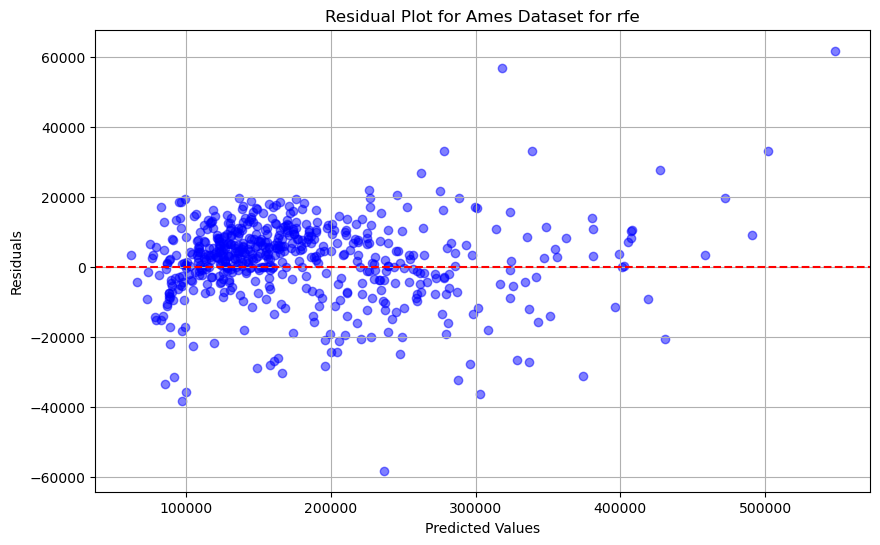

Residuals Summary Statistics:
count      571.000000
mean      1835.758708
std      11565.122762
min     -58211.359008
25%      -3297.491620
50%       3283.773706
75%       8382.195879
max      61728.889546
dtype: float64


In [40]:
import matplotlib.pyplot as plt

# Step 1: Calculate residuals
ames_residuals = ames_y_test.values - ames_y_pred_rfe

# Step 2: Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(ames_y_pred_rfe, ames_residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Ames Dataset for rfe')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Optionally, print summary statistics of the residuals
print("Residuals Summary Statistics:")
print(pd.Series(ames_residuals).describe())


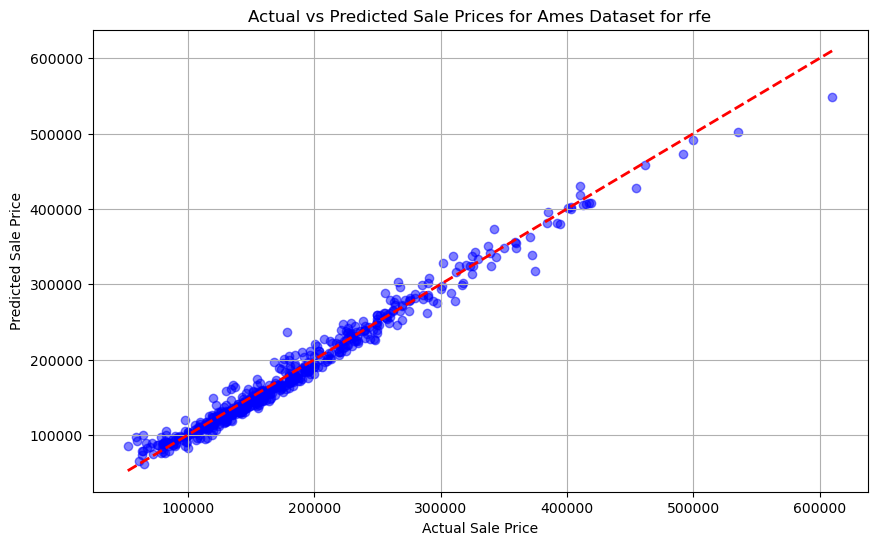

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the predicted and actual values from your model
ames_y_pred_rfe = elastic_net_rfe.predict(ames_X_test_rfe)
ames_actual_values = ames_y_test.values

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ames_actual_values, ames_y_pred_rfe, alpha=0.5, color='b')
plt.plot([ames_actual_values.min(), ames_actual_values.max()], [ames_actual_values.min(), ames_actual_values.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Sale Prices for Ames Dataset for rfe')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.grid(True)
plt.show()


In [42]:
# Reapply the polynomial features with degree 2 and RFE to the Boston dataset

# Reduce the polynomial degree to 2 for Boston dataset
boston_X_train_poly_2 = add_polynomial_features(boston_X_train.values, degree=2)
boston_X_test_poly_2 = add_polynomial_features(boston_X_test.values, degree=2)

# Initialize RFE with Elastic Net as the base model for the Boston dataset
rfe_boston = RecursiveFeatureEliminationScratch(
    model_class=ElasticNetRegressionScratch, n_features_to_select=n_features_to_select, alpha=best_alpha_en_boston, l1_ratio=best_l1_ratio_en_boston
)

# Fit RFE on the Boston dataset
rfe_boston.fit(boston_X_train_poly_2, boston_y_train.values)

# Transform the training and test sets
boston_X_train_rfe = rfe_boston.transform(boston_X_train_poly_2)
boston_X_test_rfe = rfe_boston.transform(boston_X_test_poly_2)

# Initialize Elastic Net model with the best parameters from the previous grid search
elastic_net_rfe_boston = ElasticNetRegressionScratch(alpha=best_alpha_en_boston, l1_ratio=best_l1_ratio_en_boston)

# Train the model on the reduced Boston dataset
elastic_net_rfe_boston.fit(boston_X_train_rfe, boston_y_train.values)

# Predict on the test set
boston_y_pred_rfe = elastic_net_rfe_boston.predict(boston_X_test_rfe)

# Calculate MSE, RMSE, and R-squared on the test set
mse_rfe_boston = elastic_net_rfe_boston.mean_squared_error(boston_y_test.values, boston_y_pred_rfe)
rmse_rfe_boston = np.sqrt(mse_rfe_boston)
r2_rfe_boston = r2_score(boston_y_test.values, boston_y_pred_rfe)

# Output MSE, RMSE, and R-squared
mse_rfe_boston, rmse_rfe_boston, r2_rfe_boston


(17.133991500462884, 4.139322589562559, 0.7663560945300694)

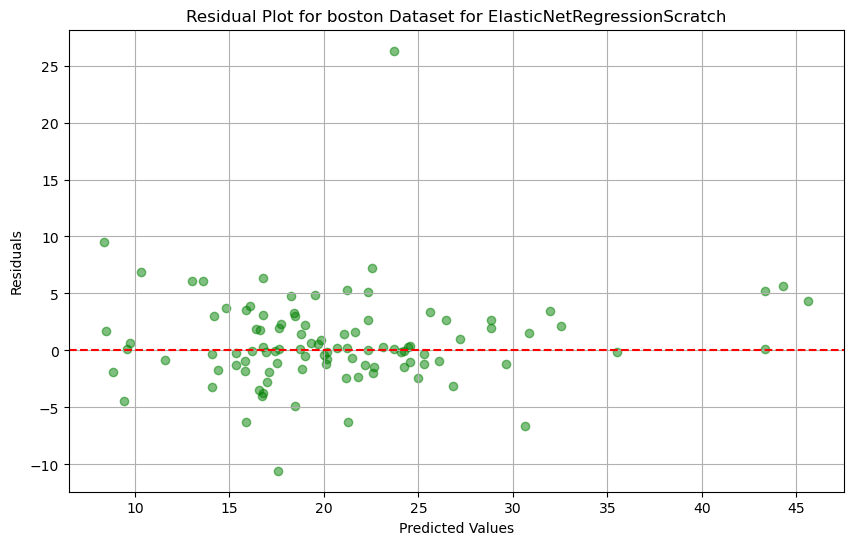

Residuals Summary Statistics: for ElasticNetRegressionScratch 
count    102.000000
mean       0.742797
std        4.092240
min      -10.550193
25%       -1.203398
50%        0.149554
75%        2.584789
max       26.299695
dtype: float64


In [43]:
import matplotlib.pyplot as plt

# Step 1: Calculate residuals
boston_residuals = boston_y_test.values - boston_y_pred_rfe

# Step 2: Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(boston_y_pred_rfe, boston_residuals, color='g', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for boston Dataset for ElasticNetRegressionScratch')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Optionally, print summary statistics of the residuals
print("Residuals Summary Statistics: for ElasticNetRegressionScratch ")
print(pd.Series(boston_residuals).describe())

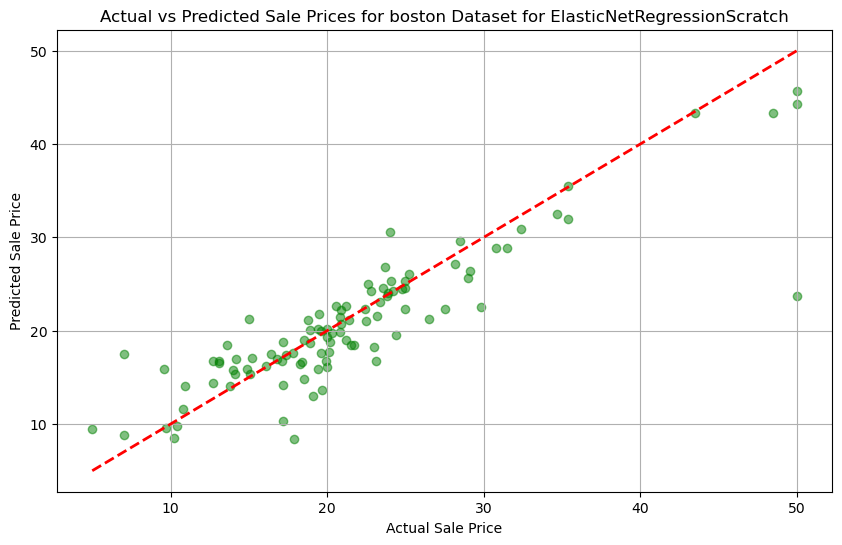

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the predicted and actual values from your model
boston_y_pred_rfe = elastic_net_rfe_boston.predict(boston_X_test_rfe)
boston_actual_values = boston_y_test.values

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(boston_actual_values, boston_y_pred_rfe, alpha=0.5, color='g')
plt.plot([boston_actual_values.min(), boston_actual_values.max()], [boston_actual_values.min(), boston_actual_values.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Sale Prices for boston Dataset for ElasticNetRegressionScratch')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.grid(True)
plt.show()

# price prediction

Boston Dataset - First Actual vs Predicted value:
Actual: 23.6, Predicted: 24.57895857472126

Ames Dataset - First Actual vs Predicted value:
Actual: 169000, Predicted: 169172.61329634735


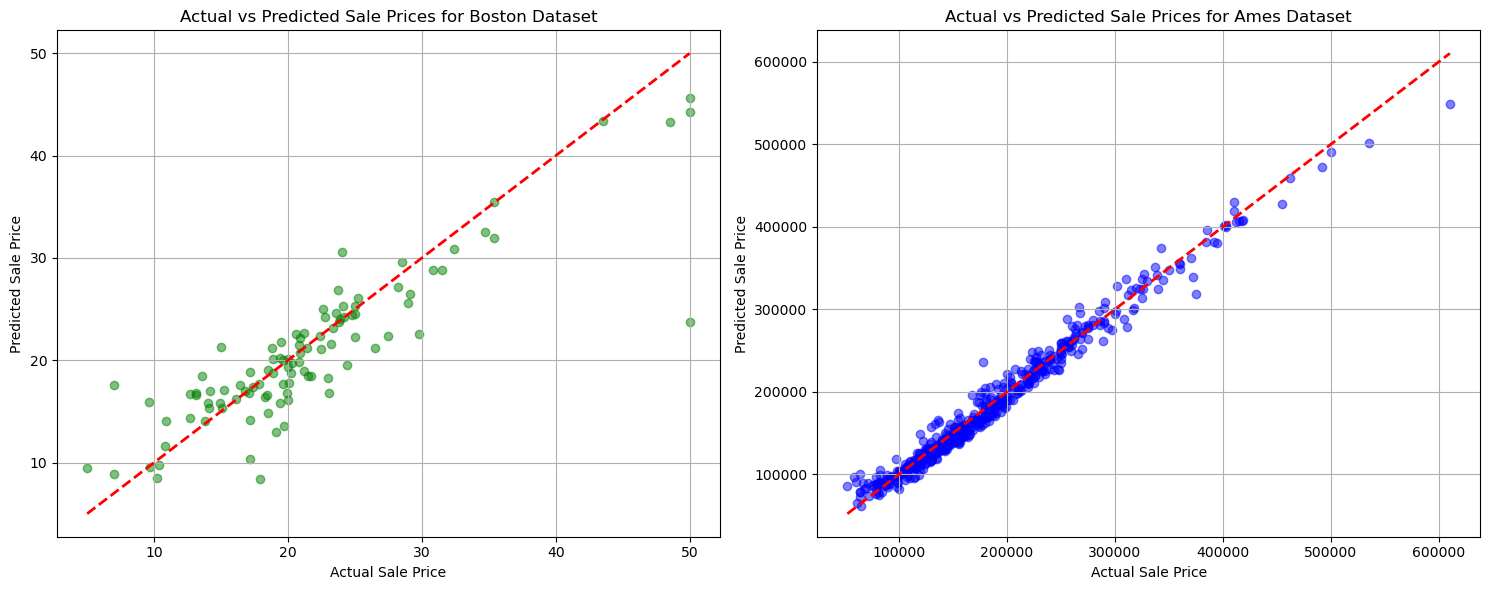

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the predicted and actual values from your model
boston_y_pred_rfe = elastic_net_rfe_boston.predict(boston_X_test_rfe)
boston_actual_values = boston_y_test.values

ames_y_pred_rfe = elastic_net_rfe.predict(ames_X_test_rfe)
ames_actual_values = ames_y_test.values

# Print the first actual vs predicted value for Boston dataset
print("Boston Dataset - First Actual vs Predicted value:")
print(f"Actual: {boston_actual_values[0]}, Predicted: {boston_y_pred_rfe[0]}")

# Print the first actual vs predicted value for Ames dataset
print("\nAmes Dataset - First Actual vs Predicted value:")
print(f"Actual: {ames_actual_values[0]}, Predicted: {ames_y_pred_rfe[0]}")

# Create a subplot for both datasets
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot for the Boston dataset
axes[0].scatter(boston_actual_values, boston_y_pred_rfe, alpha=0.5, color='g')
axes[0].plot([boston_actual_values.min(), boston_actual_values.max()], [boston_actual_values.min(), boston_actual_values.max()], 'r--', lw=2)
axes[0].set_title('Actual vs Predicted Sale Prices for Boston Dataset')
axes[0].set_xlabel('Actual Sale Price')
axes[0].set_ylabel('Predicted Sale Price')
axes[0].grid(True)

# Plot for the Ames dataset
axes[1].scatter(ames_actual_values, ames_y_pred_rfe, alpha=0.5, color='b')
axes[1].plot([ames_actual_values.min(), ames_actual_values.max()], [ames_actual_values.min(), ames_actual_values.max()], 'r--', lw=2)
axes[1].set_title('Actual vs Predicted Sale Prices for Ames Dataset')
axes[1].set_xlabel('Actual Sale Price')
axes[1].set_ylabel('Predicted Sale Price')
axes[1].grid(True)

plt.tight_layout()
plt.show()


# Principal Component Analysis (PCA)

In [139]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA(n_components=n_components)

# Apply RFE directly on the original features (before PCA)
rfe = RecursiveFeatureEliminationScratch(
    model_class=ElasticNetRegressionScratch, n_features_to_select=10, alpha=best_alpha_en_ames, l1_ratio=best_l1_ratio_en_ames
)
rfe.fit(ames_X_train_poly_ext, ames_y_train.values)

# Transform the training and test sets using RFE
ames_X_train_rfe = rfe.transform(ames_X_train_poly_ext)
ames_X_test_rfe = rfe.transform(ames_X_test_poly_ext)

# Optionally apply PCA after RFE
pca = PCA(n_components=5)  # Reducing further after RFE
ames_X_train_rfe_pca = pca.fit_transform(ames_X_train_rfe)
ames_X_test_rfe_pca = pca.transform(ames_X_test_rfe)

print("Shape after RFE - Training set:", ames_X_train_rfe.shape)
print("Shape after RFE - Test set:", ames_X_test_rfe.shape)

print("Shape after RFE + PCA - Training set:", ames_X_train_rfe_pca.shape)
print("Shape after RFE + PCA - Test set:", ames_X_test_rfe_pca.shape)

Shape after RFE - Training set: (2284, 10)
Shape after RFE - Test set: (571, 10)
Shape after RFE + PCA - Training set: (2284, 5)
Shape after RFE + PCA - Test set: (571, 5)


In [141]:
# Assuming you have already defined your ElasticNetRegressionScratch class

# Initialize and train the Elastic Net Regression model on the reduced training set (after RFE + PCA)
elastic_net_reg = ElasticNetRegressionScratch(alpha=0.1, l1_ratio=0.5,epochs=1000, learning_rate=0.01)
elastic_net_reg.fit(ames_X_train_rfe_pca, ames_y_train.values)

# Predict on the reduced test set
y_pred_en = elastic_net_reg.predict(ames_X_test_rfe_pca)

# Evaluate the model
mse_en = elastic_net_reg.mean_squared_error(ames_y_test.values, y_pred_en)
rmse_en = np.sqrt(mse_en)
r2_en = r2_score(ames_y_test.values, y_pred_en)

print("Elastic Net Regression (After RFE + PCA):")
print(f"Mean Squared Error (MSE): {mse_en}")
print(f"Root Mean Squared Error (RMSE): {rmse_en}")
print(f"R-squared (R²): {r2_en}")


Elastic Net Regression (After RFE + PCA):
Mean Squared Error (MSE): 325873441.1710545
Root Mean Squared Error (RMSE): 18051.965022430508
R-squared (R²): 0.949427742795558


In [143]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9]
}

# Initialize ElasticNet with a grid search
grid_search = GridSearchCV(
    ElasticNetRegressionScratch(),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

# Fit grid search
grid_search.fit(ames_X_train_rfe_pca, ames_y_train)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV MSE: {-grid_search.best_score_}")

# Evaluate on the test set with the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(ames_X_test_rfe_pca)

mse_best = mean_squared_error(ames_y_test, y_pred_best)
r2_best = r2_score(ames_y_test, y_pred_best)

print(f"Test Set MSE: {mse_best}")
print(f"Test Set R²: {r2_best}")


Best parameters: {'alpha': 0.01, 'l1_ratio': 0.9}
Best CV MSE: 369600443.5358575
Test Set MSE: 321695468.2318423
Test Set R²: 0.9500761218758407


In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming you have a RecursiveFeatureEliminationScratch and ElasticNetRegressionScratch class defined

# Number of features to select with RFE
n_features_to_select = 10

# Apply RFE on the original Boston dataset
rfe_boston = RecursiveFeatureEliminationScratch(
    model_class=ElasticNetRegressionScratch, n_features_to_select=n_features_to_select, alpha=0.1, l1_ratio=0.5
)
rfe_boston.fit(boston_X_train.values, boston_y_train.values)

# Transform the Boston dataset using RFE
boston_X_train_rfe = rfe_boston.transform(boston_X_train.values)
boston_X_test_rfe = rfe_boston.transform(boston_X_test.values)

# Apply PCA to further reduce dimensionality
n_components = 5
pca_boston = PCA(n_components=n_components)
boston_X_train_rfe_pca = pca_boston.fit_transform(boston_X_train_rfe)
boston_X_test_rfe_pca = pca_boston.transform(boston_X_test_rfe)

print("Shape after RFE + PCA - Training set:", boston_X_train_rfe_pca.shape)
print("Shape after RFE + PCA - Test set:", boston_X_test_rfe_pca.shape)


Shape after RFE + PCA - Training set: (404, 5)
Shape after RFE + PCA - Test set: (102, 5)


In [54]:
# Initialize and train the Elastic Net Regression model on the reduced training set (after RFE + PCA)
elastic_net_boston = ElasticNetRegressionScratch(alpha=0.1, l1_ratio=0.5)
elastic_net_boston.fit(boston_X_train_rfe_pca, boston_y_train.values)

# Predict on the reduced test set
y_pred_boston_en = elastic_net_boston.predict(boston_X_test_rfe_pca)

# Evaluate the model
mse_boston_en = elastic_net_boston.mean_squared_error(boston_y_test.values, y_pred_boston_en)
rmse_boston_en = np.sqrt(mse_boston_en)
r2_boston_en = r2_score(boston_y_test.values, y_pred_boston_en)

print("Elastic Net Regression (After RFE + PCA) - Boston Dataset:")
print(f"Mean Squared Error (MSE): {mse_boston_en}")
print(f"Root Mean Squared Error (RMSE): {rmse_boston_en}")
print(f"R-squared (R²): {r2_boston_en}")


Elastic Net Regression (After RFE + PCA) - Boston Dataset:
Mean Squared Error (MSE): 28.894994851854175
Root Mean Squared Error (RMSE): 5.375406482476853
R-squared (R²): 0.6059797598511496


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# Define the parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9]
}

# Initialize ElasticNet with a grid search
grid_search_boston = GridSearchCV(
    ElasticNet(),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

# Fit grid search on the RFE + PCA transformed training data
grid_search_boston.fit(boston_X_train_rfe_pca, boston_y_train.values)

# Best parameters and score
print(f"Best parameters (Boston): {grid_search_boston.best_params_}")
print(f"Best CV MSE (Boston): {-grid_search_boston.best_score_}")

# Evaluate on the test set with the best model
best_boston_model = grid_search_boston.best_estimator_
y_pred_boston_best = best_boston_model.predict(boston_X_test_rfe_pca)

mse_boston_best = mean_squared_error(boston_y_test.values, y_pred_boston_best)
r2_boston_best = r2_score(boston_y_test.values, y_pred_boston_best)

print(f"Test Set MSE (Boston - Best Model): {mse_boston_best}")
print(f"Test Set R² (Boston - Best Model): {r2_boston_best}")


Best parameters (Boston): {'alpha': 0.01, 'l1_ratio': 0.1}
Best CV MSE (Boston): 28.383724358645924
Test Set MSE (Boston - Best Model): 29.788904988556432
Test Set R² (Boston - Best Model): 0.5937901509399608


# GradientBoostingRegressor for boston

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train a Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(boston_X_train, boston_y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(boston_X_test)

# Evaluate the model
mse_gb = mean_squared_error(boston_y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(boston_y_test, y_pred_gb)

print("Gradient Boosting Regression - Boston Dataset:")
print(f"Mean Squared Error (MSE): {mse_gb}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb}")
print(f"R-squared (R²): {r2_gb}")


Gradient Boosting Regression - Boston Dataset:
Mean Squared Error (MSE): 9.032636005157268
Root Mean Squared Error (RMSE): 3.005434412053816
R-squared (R²): 0.8768284463736169


In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

gb_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
gb_grid_search.fit(boston_X_train, boston_y_train)

print("Best parameters:", gb_grid_search.best_params_)
print("Best CV MSE:", -gb_grid_search.best_score_)


Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Best CV MSE: 15.169603903351817


# best model of boston

In [60]:
# Initialize the Gradient Boosting model with the best parameters
gb_best_model = GradientBoostingRegressor(
    n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42
)
gb_best_model.fit(boston_X_train, boston_y_train)

# Predict on the test set
y_pred_gb_best = gb_best_model.predict(boston_X_test)

# Evaluate the model
mse_gb_best = mean_squared_error(boston_y_test, y_pred_gb_best)
rmse_gb_best = np.sqrt(mse_gb_best)
r2_gb_best = r2_score(boston_y_test, y_pred_gb_best)

print("Gradient Boosting Regression (Best Model) - Boston Dataset:")
print(f"Mean Squared Error (MSE): {mse_gb_best}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb_best}")
print(f"R-squared (R²): {r2_gb_best}")


Gradient Boosting Regression (Best Model) - Boston Dataset:
Mean Squared Error (MSE): 7.750495560630926
Root Mean Squared Error (RMSE): 2.783971185309023
R-squared (R²): 0.8943120724634276


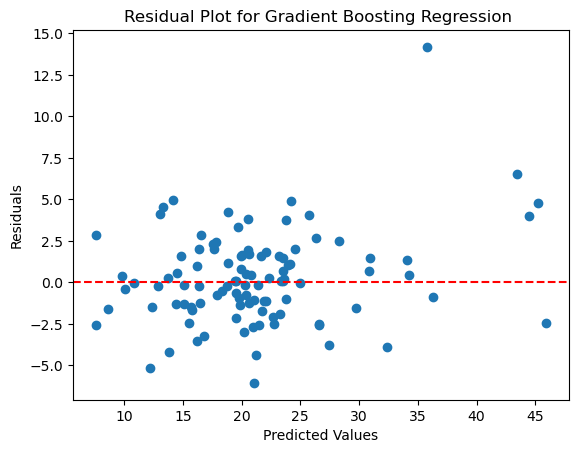

In [61]:
residuals = boston_y_test - y_pred_gb_best
plt.scatter(y_pred_gb_best, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Gradient Boosting Regression ")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()



Boston Dataset - First Actual vs Predicted value:
Actual: 23.6, Predicted: 23.496164048397652


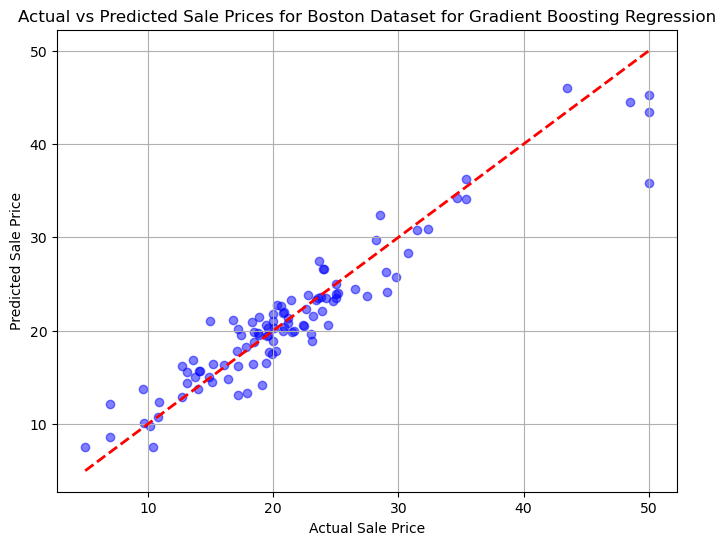

In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Gradient Boosting model with the best parameters
gb_best_model = GradientBoostingRegressor(
    n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42
)
gb_best_model.fit(boston_X_train, boston_y_train)

# Predict on the test set
y_pred_gb_best = gb_best_model.predict(boston_X_test)

# Evaluate the model
mse_gb_best = mean_squared_error(boston_y_test, y_pred_gb_best)
rmse_gb_best = np.sqrt(mse_gb_best)
r2_gb_best = r2_score(boston_y_test, y_pred_gb_best)

# Print the first actual vs predicted value for the Boston dataset
print("\nBoston Dataset - First Actual vs Predicted value:")
print(f"Actual: {boston_y_test.values[0]}, Predicted: {y_pred_gb_best[0]}")

# Create a plot for the Boston dataset
plt.figure(figsize=(8, 6))
plt.scatter(boston_y_test.values, y_pred_gb_best, alpha=0.5, color='b')
plt.plot([boston_y_test.values.min(), boston_y_test.values.max()], 
         [boston_y_test.values.min(), boston_y_test.values.max()], 
         'r--', lw=2)
plt.title('Actual vs Predicted Sale Prices for Boston Dataset for Gradient Boosting Regression')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.grid(True)
plt.show()


# Support Vector Machines (SVM)

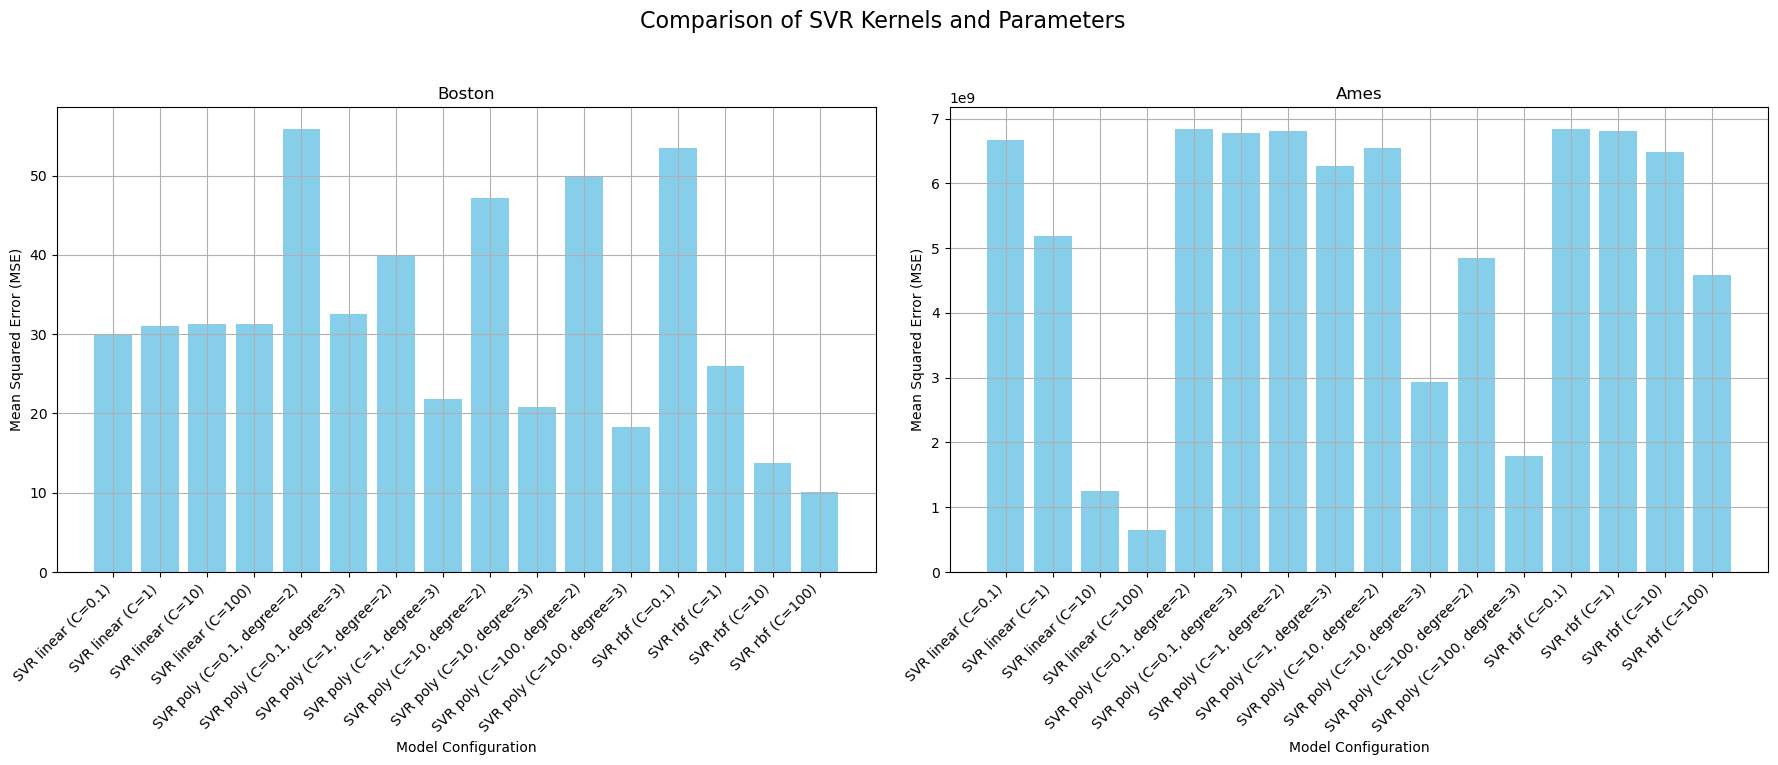


Boston Dataset Results:
SVR linear (C=0.1) -> MSE: 29.86, RMSE: 5.46, R²: 0.59
SVR linear (C=1) -> MSE: 31.07, RMSE: 5.57, R²: 0.58
SVR linear (C=10) -> MSE: 31.25, RMSE: 5.59, R²: 0.57
SVR linear (C=100) -> MSE: 31.25, RMSE: 5.59, R²: 0.57
SVR poly (C=0.1, degree=2) -> MSE: 55.82, RMSE: 7.47, R²: 0.24
SVR poly (C=0.1, degree=3) -> MSE: 32.49, RMSE: 5.70, R²: 0.56
SVR poly (C=1, degree=2) -> MSE: 39.85, RMSE: 6.31, R²: 0.46
SVR poly (C=1, degree=3) -> MSE: 21.85, RMSE: 4.67, R²: 0.70
SVR poly (C=10, degree=2) -> MSE: 47.12, RMSE: 6.86, R²: 0.36
SVR poly (C=10, degree=3) -> MSE: 20.78, RMSE: 4.56, R²: 0.72
SVR poly (C=100, degree=2) -> MSE: 49.82, RMSE: 7.06, R²: 0.32
SVR poly (C=100, degree=3) -> MSE: 18.31, RMSE: 4.28, R²: 0.75
SVR rbf (C=0.1) -> MSE: 53.45, RMSE: 7.31, R²: 0.27
SVR rbf (C=1) -> MSE: 25.94, RMSE: 5.09, R²: 0.65
SVR rbf (C=10) -> MSE: 13.72, RMSE: 3.70, R²: 0.81
SVR rbf (C=100) -> MSE: 10.14, RMSE: 3.18, R²: 0.86

Ames Dataset Results:
SVR linear (C=0.1) -> MSE: 66622

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define datasets (Assume boston_X_train, boston_X_test, ames_X_train, ames_X_test are already defined)
datasets = {
    "Boston": (boston_X_train, boston_y_train, boston_X_test, boston_y_test),
    "Ames": (ames_X_train, ames_y_train, ames_X_test, ames_y_test)
}

# Define kernels and parameters to test
kernels = ['linear', 'poly', 'rbf']
C_values = [0.1, 1, 10, 100]
degrees = [2, 3]  # Only relevant for polynomial kernel
results = {dataset: {} for dataset in datasets}

# Iterate over datasets and configurations
for dataset_name, (X_train, y_train, X_test, y_test) in datasets.items():
    for kernel in kernels:
        for C in C_values:
            if kernel == 'poly':
                for degree in degrees:
                    svr = SVR(kernel=kernel, C=C, degree=degree)
                    svr.fit(X_train, y_train)
                    y_pred = svr.predict(X_test)
                    mse = mean_squared_error(y_test, y_pred)
                    rmse = np.sqrt(mse)
                    r2 = r2_score(y_test, y_pred)
                    results[dataset_name][f'SVR {kernel} (C={C}, degree={degree})'] = (mse, rmse, r2)
            else:
                svr = SVR(kernel=kernel, C=C)
                svr.fit(X_train, y_train)
                y_pred = svr.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)
                rmse = np.sqrt(mse)
                r2 = r2_score(y_test, y_pred)
                results[dataset_name][f'SVR {kernel} (C={C})'] = (mse, rmse, r2)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Comparison of SVR Kernels and Parameters', fontsize=16)

for ax, (dataset_name, dataset_results) in zip(axes, results.items()):
    ax.set_title(dataset_name)
    ax.set_xlabel('Model Configuration')
    ax.set_ylabel('Mean Squared Error (MSE)')
    ax.set_xticks(range(len(dataset_results)))
    ax.set_xticklabels(dataset_results.keys(), rotation=45, ha='right')
    
    mse_values = [result[0] for result in dataset_results.values()]
    ax.bar(range(len(dataset_results)), mse_values, color='skyblue')
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Print results
for dataset_name, dataset_results in results.items():
    print(f"\n{dataset_name} Dataset Results:")
    for config, (mse, rmse, r2) in dataset_results.items():
        print(f"{config} -> MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")


In [65]:
import numpy as np

# Boston dataset results (MSE, R²)
boston_results = {
    "SVR linear (C=0.1)": (29.86, 0.59),
    "SVR linear (C=1)": (31.07, 0.58),
    "SVR linear (C=10)": (31.25, 0.57),
    "SVR linear (C=100)": (31.25, 0.57),
    "SVR poly (C=0.1, degree=2)": (55.82, 0.24),
    "SVR poly (C=0.1, degree=3)": (32.49, 0.56),
    "SVR poly (C=1, degree=2)": (39.85, 0.46),
    "SVR poly (C=1, degree=3)": (21.85, 0.70),
    "SVR poly (C=10, degree=2)": (47.12, 0.36),
    "SVR poly (C=10, degree=3)": (20.78, 0.72),
    "SVR poly (C=100, degree=2)": (49.82, 0.32),
    "SVR poly (C=100, degree=3)": (18.31, 0.75),
    "SVR rbf (C=0.1)": (53.45, 0.27),
    "SVR rbf (C=1)": (25.94, 0.65),
    "SVR rbf (C=10)": (13.72, 0.81),
    "SVR rbf (C=100)": (10.14, 0.86)
}

# Ames dataset results (MSE, R²)
ames_results = {
    "SVR linear (C=0.1)": (6662269063.69, -0.03),
    "SVR linear (C=1)": (5188332941.41, 0.19),
    "SVR linear (C=10)": (1248126546.69, 0.81),
    "SVR linear (C=100)": (650093781.14, 0.90),
    "SVR poly (C=0.1, degree=2)": (6832299033.11, -0.06),
    "SVR poly (C=0.1, degree=3)": (6776879495.52, -0.05),
    "SVR poly (C=1, degree=2)": (6804970505.37, -0.06),
    "SVR poly (C=1, degree=3)": (6265906726.28, 0.03),
    "SVR poly (C=10, degree=2)": (6541025115.42, -0.02),
    "SVR poly (C=10, degree=3)": (2930865105.79, 0.55),
    "SVR poly (C=100, degree=2)": (4855029265.42, 0.25),
    "SVR poly (C=100, degree=3)": (1787043320.66, 0.72),
    "SVR rbf (C=0.1)": (6832238085.66, -0.06),
    "SVR rbf (C=1)": (6804344327.95, -0.06),
    "SVR rbf (C=10)": (6484194318.24, -0.01),
    "SVR rbf (C=100)": (4584897187.48, 0.29)
}

# Function to calculate average MSE and R²
def calculate_averages(results):
    mse_values = [value[0] for value in results.values()]
    r2_values = [value[1] for value in results.values()]
    
    avg_mse = np.mean(mse_values)
    avg_r2 = np.mean(r2_values)
    
    return avg_mse, avg_r2

# Calculate averages for Boston and Ames datasets
boston_avg_mse, boston_avg_r2 = calculate_averages(boston_results)
ames_avg_mse, ames_avg_r2 = calculate_averages(ames_results)

boston_avg_mse, boston_avg_r2, ames_avg_mse, ames_avg_r2

print(f"Boston Dataset:")
print(f"  - Average Mean Squared Error (MSE): {boston_avg_mse:.2f}")
print(f"  - Average R-squared (R²): {boston_avg_r2:.3f}")

print(f"\nAmes Dataset:")
print(f"  - Average Mean Squared Error (MSE): {ames_avg_mse:.2f}")
print(f"  - Average R-squared (R²): {ames_avg_r2:.3f}")


Boston Dataset:
  - Average Mean Squared Error (MSE): 32.05
  - Average R-squared (R²): 0.563

Ames Dataset:
  - Average Mean Squared Error (MSE): 5078032176.24
  - Average R-squared (R²): 0.212


# model evalution

## boston dataset

In [68]:
import pandas as pd

# Define model evaluation metrics
evaluation_metrics = {
    "Model": [
        "Linear Regression",
        "Lasso Regression",
        "Ridge Regression",
        "Elastic Net Regression (Hyperparameter Tuning)",
        "Elastic Net Regression (Cross Validation)",
        "Elastic Net Regression (After RFE)",
        "Elastic Net Regression (After RFE + PCA)",
        "Gradient Boosting Regression",
        "Gradient Boosting Regression (Best Model)"
    ],
    "MSE": [
        27.399794086164256,
        27.417890435753723,
        27.305526997399145,
        28.383724358645924,  # Best CV MSE for Elastic Net
        29.788904988556432,  # Test Set MSE for Elastic Net (Best Model)
        19.18309638138365,   # RFE MSE for Elastic Net
        28.894994851854175,  # After RFE + PCA MSE for Elastic Net
        9.032636005157268,
        7.750495560630926
    ],
    "RMSE": [
        5.234481262375887,
        5.236209548495335,
        5.225469069605057,
        np.sqrt(28.383724358645924),  # RMSE for Elastic Net (Best CV Model)
        np.sqrt(29.788904988556432),  # RMSE for Elastic Net (Best Model)
        np.sqrt(19.18309638138365),   # RFE RMSE for Elastic Net
        np.sqrt(28.894994851854175),  # After RFE + PCA RMSE for Elastic Net
        3.005434412053816,
        2.783971185309023
    ],
    "R²": [
        0.6263687361353962,
        0.6261219692455728,
        0.6276541885517679,
        0.7762724250967808,  # R² for Elastic Net (Best CV Model)
        0.5937901509399608,  # R² for Elastic Net (Best Model)
        0.7663560945300694,  # R² for RFE Elastic Net
        0.6059797598511496,  # After RFE + PCA R² for Elastic Net
        0.8768284463736169,
        0.8943120724634276
    ]
}

# Create DataFrame
df_evaluation = pd.DataFrame(evaluation_metrics)

# Display DataFrame
print(df_evaluation)


                                            Model        MSE      RMSE  \
0                               Linear Regression  27.399794  5.234481   
1                                Lasso Regression  27.417890  5.236210   
2                                Ridge Regression  27.305527  5.225469   
3  Elastic Net Regression (Hyperparameter Tuning)  28.383724  5.327638   
4       Elastic Net Regression (Cross Validation)  29.788905  5.457921   
5              Elastic Net Regression (After RFE)  19.183096  4.379851   
6        Elastic Net Regression (After RFE + PCA)  28.894995  5.375406   
7                    Gradient Boosting Regression   9.032636  3.005434   
8       Gradient Boosting Regression (Best Model)   7.750496  2.783971   

         R²  
0  0.626369  
1  0.626122  
2  0.627654  
3  0.776272  
4  0.593790  
5  0.766356  
6  0.605980  
7  0.876828  
8  0.894312  


## ames dataset

In [147]:
import pandas as pd

# Data for the DataFrame
data = {
    "Model": [
        "Linear Regression",
        "Lasso Regression",
        "Ridge Regression",
        "Elastic Net Regression",
        "RFE",
        "Elastic Net Regression (After RFE + PCA)",
        "SVR linear (C=100)",
        "SVR poly (C=100, degree=3)",
        "SVR rbf (C=100)"
    ],
    "MSE": [
        491404262.86, 
        583594753.66, 
        491404258.37, 
        240024200.27, 
        136887832.75,
        325873441.17, 
        650093781.14,
        1787043320.66, 
        4584897187.48
    ],
    "RMSE": [
        22167.64, 
        24157.71, 
        22167.64, 
        15492.71, 
        11699.91, 
        18051.97, 
        np.sqrt(650093781.14), 
        np.sqrt(1787043320.66), 
        np.sqrt(4584897187.48)
    ],
    "R²": [
        0.9237, 
        0.9094, 
        0.9237, 
        0.9628, 
        0.9788,
        0.9494, 
        0.90,
        0.72, 
        0.29
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


                                      Model           MSE          RMSE  \
0                         Linear Regression  4.914043e+08  22167.640000   
1                          Lasso Regression  5.835948e+08  24157.710000   
2                          Ridge Regression  4.914043e+08  22167.640000   
3                    Elastic Net Regression  2.400242e+08  15492.710000   
4                                       RFE  1.368878e+08  11699.910000   
5  Elastic Net Regression (After RFE + PCA)  3.258734e+08  18051.970000   
6                        SVR linear (C=100)  6.500938e+08  25496.936701   
7                SVR poly (C=100, degree=3)  1.787043e+09  42273.435165   
8                           SVR rbf (C=100)  4.584897e+09  67711.868882   

       R²  
0  0.9237  
1  0.9094  
2  0.9237  
3  0.9628  
4  0.9788  
5  0.9494  
6  0.9000  
7  0.7200  
8  0.2900  


# inflation of ames 

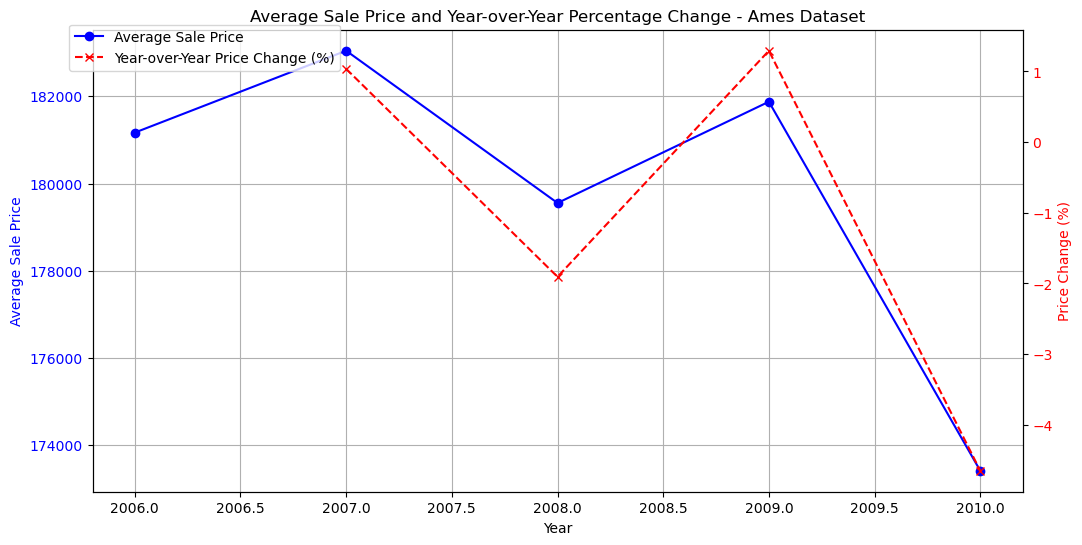

   YrSold      SalePrice  inflation_ratio
0    2006  181166.555921              NaN
1    2007  183043.034125         1.035775
2    2008  179553.585124        -1.906354
3    2009  181874.623234         1.292672
4    2010  173418.175227        -4.649603


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Calculate the average sale price per year
average_sale_price_per_year = ames_df.groupby('YrSold')['SalePrice'].mean().reset_index()

# Step 2: Calculate the year-over-year percentage change in average sale price
average_sale_price_per_year['inflation_ratio'] = average_sale_price_per_year['SalePrice'].pct_change() * 100  # Percentage change

# Step 3: Create a combined plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the average sale prices over time on the first y-axis
ax1.plot(average_sale_price_per_year['YrSold'], average_sale_price_per_year['SalePrice'], label='Average Sale Price', marker='o', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Sale Price', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create a second y-axis for the percentage change
ax2 = ax1.twinx()
ax2.plot(average_sale_price_per_year['YrSold'], average_sale_price_per_year['inflation_ratio'], label='Year-over-Year Price Change (%)', marker='x', linestyle='--', color='r')
ax2.set_ylabel('Price Change (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Combine legends from both plots
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.title('Average Sale Price and Year-over-Year Percentage Change - Ames Dataset')
plt.show()

# Print the DataFrame showing the year, average sale price, and price change
print(average_sale_price_per_year[['YrSold', 'SalePrice', 'inflation_ratio']])


# inflation of boston

In [74]:
import numpy as np
import pandas as pd


# Step 1: Determine the number of data points
num_data_points = boston_df.shape[0]

# Step 2: Generate a synthetic 'Year' column starting from 1970
# Assume we want to distribute the years from 1970 to 2000 across the dataset
years = np.linspace(1970, 2000, num=num_data_points, dtype=int)

# Alternatively, if you want to loop through years (e.g., 1970, 1971, ..., 2000, then repeat):
# years = np.tile(np.arange(1970, 2001), int(np.ceil(num_data_points / 31)))[:num_data_points]

# Add the generated 'Year' column to the dataset
boston_df['Year'] = years

# Now the Boston dataset will have a 'Year' column that you can use for further analysis
print(boston_df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  Year  
0     15.3  396.90   4.98  24.0  1970  
1     17.8  396.90   9.14  21.6  1970  
2     17.8  392.83   4.03  34.7  1970  
3     18.7  394.63   2.94  33.4  1970  
4     18.7  396.90   5.33  36.2  1970  


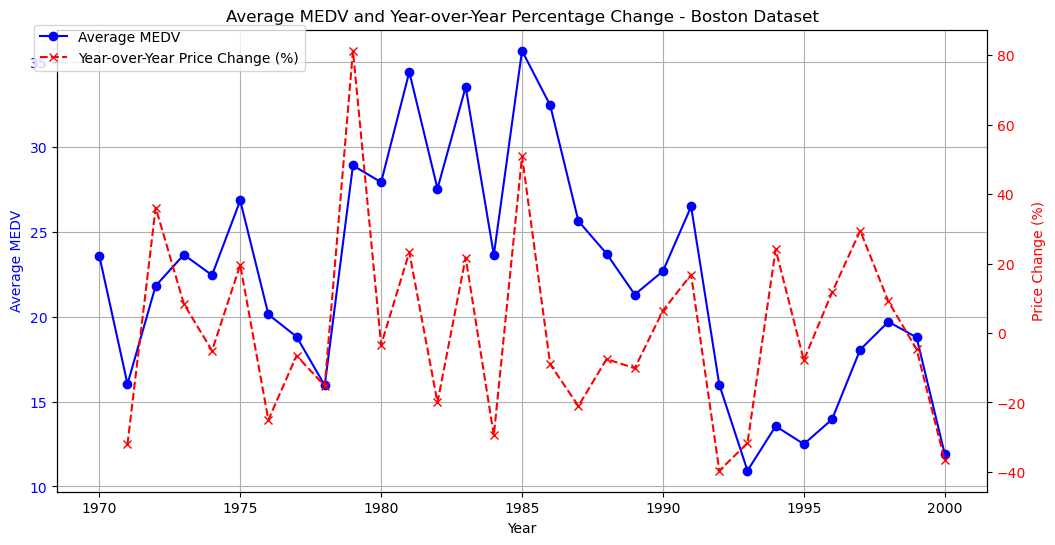

    Year       MEDV  inflation_ratio
0   1970  23.600000              NaN
1   1971  16.035294       -32.053838
2   1972  21.823529        36.096845
3   1973  23.658824         8.409704
4   1974  22.452941        -5.096967
5   1975  26.856250        19.611278
6   1976  20.135294       -25.025668
7   1977  18.823529        -6.514753
8   1978  15.952941       -15.250000
9   1979  28.917647        81.268437
10  1980  27.929412        -3.417413
11  1981  34.431250        23.279539
12  1982  27.552941       -19.976936
13  1983  33.541176        21.733561
14  1984  23.647059       -29.498422
15  1985  35.682353        50.895522
16  1986  32.464706        -9.017474
17  1987  25.643750       -21.010373
18  1988  23.717647        -7.511003
19  1989  21.311765       -10.143849
20  1990  22.688235         6.458736
21  1991  26.500000        16.800622
22  1992  15.994118       -39.644839
23  1993  10.925000       -31.693637
24  1994  13.552941        24.054381
25  1995  12.494118        -7.812500
2

In [75]:
import matplotlib.pyplot as plt

# Step 1: Calculate the average MEDV per year
average_medv_per_year = boston_df.groupby('Year')['MEDV'].mean().reset_index()

# Step 2: Calculate the year-over-year percentage change in average MEDV
average_medv_per_year['inflation_ratio'] = average_medv_per_year['MEDV'].pct_change() * 100  # Percentage change

# Step 3: Create a combined plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the average MEDV over time on the first y-axis
ax1.plot(average_medv_per_year['Year'], average_medv_per_year['MEDV'], label='Average MEDV', marker='o', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average MEDV', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create a second y-axis for the percentage change
ax2 = ax1.twinx()
ax2.plot(average_medv_per_year['Year'], average_medv_per_year['inflation_ratio'], label='Year-over-Year Price Change (%)', marker='x', linestyle='--', color='r')
ax2.set_ylabel('Price Change (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Combine legends from both plots
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.title('Average MEDV and Year-over-Year Percentage Change - Boston Dataset')
plt.show()
print(average_medv_per_year[['Year', 'MEDV', 'inflation_ratio']])

